Cosmo MCMC is landing on biased HOD + Cosmology. I'm gonna first look at the code to make preds, and compare to the emulator. 

In [1]:
from pearce.emulator import OriginalRecipe, ExtraCrispy, SpicyBuffalo
from pearce.mocks import cat_dict
import numpy as np
from os import path

In [2]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
#training_file = '/scratch/users/swmclau2/xi_zheng07_cosmo_lowmsat/PearceRedMagicXiCosmoFixedNd.hdf5'
training_file = '/u/ki/swmclau2/des/PearceRedMagicXiCosmoFixedNdLowMsat.hdf5'
#test_file = '/scratch/users/swmclau2/xi_zheng07_cosmo_test_lowmsat/PearceRedMagicXiCosmoFixedNd_Test.hdf5'
test_file = '/u/ki/swmclau2/des/PearceRedMagicXiCosmoFixedNdLowMsatTest.hdf5'

#test_file = '/u/ki/swmclau2/des/xi_cosmo_tester/PearceRedMagicXiCosmoFixedNd_test.hdf5'
em_method = 'gp'
split_method = 'random'

In [4]:
a = 1.0
z = 1.0/a - 1.0

In [5]:
fixed_params = {'z':z}#, 'cosmo': 3}#, 'r':0.53882047}

In [6]:
np.random.seed(0)
emu = SpicyBuffalo(training_file, method = em_method, fixed_params=fixed_params,
                 custom_mean_function = 'linear', downsample_factor = 0.1)

40000 18
{}
{'Neff': [1.49655743, -9.94571436], 'amp': [-2.92565173, -10.26944746], 'logM0': [1.17087069, 6.50103759], 'logM1': [-1.91976981, -11.7173251], 'H0': [-4.72773171, -1.33582408], 'w0': [10.0699553, 12.01525603], 'sigma_logM': [0.97997249, 9.70125021], 'bias': [5.30324096], 'omch2': [-2.48246708, 0.50210416], 'ln10As': [0.15083459, 4.78413158], 'alpha': [7.17709699, -0.10738552], 'ns': [-8.69248089, 5.89975769], 'ombh2': [-4.42429766, 10.37865121]}
{'Neff': [1.49655743, -9.94571436], 'amp': [-2.92565173, -10.26944746], 'logM0': [1.17087069, 6.50103759], 'logM1': [-1.91976981, -11.7173251], 'H0': [-4.72773171, -1.33582408], 'w0': [10.0699553, 12.01525603], 'sigma_logM': [0.97997249, 9.70125021], 'bias': [5.30324096], 'omch2': [-2.48246708, 0.50210416], 'ln10As': [0.15083459, 4.78413158], 'alpha': [7.17709699, -0.10738552], 'ns': [-8.69248089, 5.89975769], 'ombh2': [-4.42429766, 10.37865121]}


/u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:287: UserWarning: WARNING: NaN detected. Skipped 21 points in training data.
  warnings.warn('WARNING: NaN detected. Skipped %d points in training data.' % (num_skipped))


In [7]:
emu.downsample_x[0]

array([[ 0.25505943, -1.06774736,  1.12812633, ...,  1.32824196,
        -1.30730569, -0.61128628],
       [-1.22755426, -0.28587034,  0.79496373, ..., -0.97484581,
         0.45280527, -0.57318286],
       [ 0.25118492, -0.08194602, -0.66044351, ...,  1.36980144,
         1.02795964, -1.62968685],
       ...,
       [-0.49052942, -0.09342656, -0.5888257 , ...,  0.25808539,
        -0.31291229, -1.15166209],
       [ 0.25505943, -1.06774736,  1.12812633, ..., -1.69867339,
        -1.54984066, -1.31793158],
       [ 1.8068932 , -0.09445741,  0.62761446, ...,  1.60876844,
        -1.21722127,  1.45669039]])

In [8]:
emu.get_param_names()

['ombh2',
 'omch2',
 'w0',
 'ns',
 'ln10As',
 'H0',
 'Neff',
 'logM0',
 'sigma_logM',
 'logM1',
 'alpha']

In [9]:
v = np.ones_like(emu._emulators[0].get_parameter_vector())*12.0

In [10]:
if hasattr(emu, "_emulator"):
    emu._emulator.set_parameter_vector(v)
    emu._emulator.recompute()
else:
    for _emulator in emu._emulators:
        _emulator.set_parameter_vector(v)
        _emulator.recompute()

In [11]:
emu._emulators[0].get_parameter_vector()

array([12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.])

In [12]:
gof = emu.goodness_of_fit(test_file, statistic='log_frac')

In [13]:
for g in gof:
    print np.mean(g), np.median(g)

0.016663749841401836 0.015394425796559833
0.015913610337888826 0.014358885073109801
0.015088090177034908 0.01365688855724672
0.01565687588028689 0.01457858231652607
0.013770022680520619 0.012948624450436472
0.011954874101175022 0.010720220870995608
0.010561481464609054 0.0090337532066442
0.00997100996570376 0.008380182281927231
0.01163280927473278 0.01008136150676843
0.015252065283447068 0.013761009565601785
0.021330729155602034 0.020254627275658882
0.022108333299137504 0.01874751906883611
0.025372944408818432 0.023042156735729367
0.03474011583896769 0.03115995954578811
0.08268090684853216 0.06561183993236208
0.26947361203443293 0.08244631542175923
0.5521829897622359 0.029944793870621385
0.07236381339005372 0.021738610407062164


In [14]:
params = {}
for pname in emu.get_param_names():
    if pname == 'r':
        continue
    low, high = emu.get_param_bounds(pname)
    params[pname] = np.random.uniform(low, high)
    
print params

{'logM1': 13.657117929316433, 'Neff': 3.059556158616173, 'logM0': 14.502237527930092, 'sigma_logM': 0.2221089997733271, 'H0': 73.93039652602585, 'w0': -1.0165584638718168, 'omch2': 0.11687563201570395, 'ln10As': 3.1161480667272405, 'alpha': 1.170897852117133, 'ns': 0.996653036549747, 'ombh2': 0.02223271002336728}


In [15]:
fixed_params = {}#'f_c':1.0}#,'logM1': 13.8 }# 'z':0.0}

cosmo_params = {'simname':'testbox', 'boxno': 3, 'realization': 0, 'scale_factors':[1.0], 'system': 'ki-ls'}
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [16]:
cat.load(1.0, HOD='zheng07')

In [17]:
print len(cat.halocat.halo_table)

9547354


In [18]:
cat._get_cosmo_param_names_vals()[1]

array([ 2.17629e-02,  1.22830e-01, -1.13151e+00,  9.53515e-01,
        3.11395e+00,  7.07317e+01,  3.70000e+00])

In [19]:
test_point_idx = 1
test_point_dict = dict(zip(emu.get_param_names(), emu.x[0][test_point_idx]*emu._x_std[0]+emu._x_mean[0]))

In [20]:
#hod_param_names = ['logM0', 'sigma_logM', 'logM1', 'alpha']
emulation_point = [('logM0', 14.0), ('sigma_logM', 0.2),
                    ('alpha', 1.083),('logM1', 13.7)]#, ('logMmin', 12.233)]

#em_params = {key:test_point_dict[key] for key in hod_param_names}
#em_params = dict(zip(hod_param_names, x_point))
em_params = dict(emulation_point)
em_params.update(fixed_params)

In [21]:
from scipy.optimize import minimize_scalar
def add_logMmin(hod_params, cat, nd = 1e-4):
    """
    In the fixed number density case, find the logMmin value that will match the nd given hod_params
    :param: hod_params:
        The other parameters besides logMmin
    :param cat:
        the catalog in question
    :return:
        None. hod_params will have logMmin added to it.
    """
    hod_params['logMmin'] = 13.0 #initial guess
    #cat.populate(hod_params) #may be overkill, but will ensure params are written everywhere
    def func(logMmin, hod_params):
        hod_params.update({'logMmin':logMmin})
        calc_nd = cat.calc_analytic_nd(hod_params)
        #print logMmin, calc_nd
        return (calc_nd - nd)**2

    res = minimize_scalar(func, bounds = (12, 16), args = (hod_params,), options = {'maxiter':100}, method = 'Bounded' )
    # assuming this doens't fail
    hod_params['logMmin'] = res.x


In [22]:
add_logMmin(em_params, cat)

In [23]:
r_bins = np.logspace(-1.1, 1.6, 19)
rpoints = (r_bins[1:]+r_bins[:-1])/2.0

In [24]:
em_params['logMmin']

13.401595794926763

In [25]:
print em_params

{'logMmin': 13.401595794926763, 'logM1': 13.7, 'logM0': 14.0, 'sigma_logM': 0.2, 'alpha': 1.083}


In [26]:
# get cosmo params
try:
    del em_params['logMmin']
except KeyError:
    pass
cpv = cat._get_cosmo_param_names_vals()

cosmo_param_dict = {key: val for key, val in zip(cpv[0], cpv[1])}

em_params.update( cosmo_param_dict)


In [27]:
print em_params

{'Neff': 3.7, 'logM0': 14.0, 'logM1': 13.7, 'H0': 70.7317, 'w0': -1.13151, 'ln10As': 3.11395, 'omch2': 0.12283, 'sigma_logM': 0.2, 'alpha': 1.083, 'ns': 0.953515, 'ombh2': 0.0217629}


In [28]:
y_pred = emu.emulate_wrt_r(em_params)[0]

In [29]:
y_calc = np.loadtxt('/u/ki/swmclau2/Git/pearce/bin/mcmc/xi_gg_true.npy')

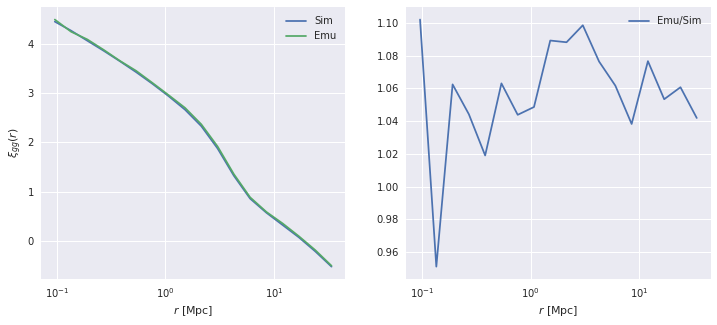

In [30]:
fig = plt.figure(figsize = (12, 5))

plt.subplot(121)
#plt.plot(rpoints, y_calc, label = 'Sim')
plt.plot(rpoints, y_calc, label = 'Sim')
plt.plot(rpoints, y_pred, label = 'Emu')
plt.xscale('log')
plt.legend(loc = 'best')
plt.ylabel(r'$\xi_{gg}(r)$')
plt.xlabel(r'$r$ [Mpc]')
plt.subplot(122)
#plt.plot(rpoints, y_calc/y_point, label = 'Sim')
plt.plot(rpoints, (10**y_pred)/(10**y_calc), label = 'Emu/Sim')
plt.legend(loc = 'best')
plt.xlabel(r'$r$ [Mpc]')

plt.xscale('log')
plt.show()

In [112]:
print y_pred/y_calc

[1.0094631  0.99491757 1.00646268 1.00485914 1.00224468 1.00774011
 1.00583846 1.00701067 1.01390478 1.01571811 1.02170158 1.02409782
 1.03017221 1.02842119 1.09910758 1.31130965 0.87860255 0.96579886]


In [69]:
fixed_params = {'z':z, 'cosmo': 3}#, 'r':0.53882047}
train_x, train_y, _, info = emu.get_data(test_file, fixed_params, None)#, skip_nans = False)

In [70]:
info

{'n_bins': 18,
 'obs': 'xi',
 'ordered_params': OrderedDict([('logM0', (13.1, 14.6)),
              ('sigma_logM', (0.05, 0.3)),
              ('logM1', (13.1, 14.6)),
              ('alpha', (0.8, 1.2)),
              ('r', (-1.1000000189853054, 1.6000000000507297))]),
 'rbc': array([0.]),
 'sbc': array([ 0.09581734,  0.13534558,  0.19118072,  0.27004994,  0.38145568,
         0.53882047,  0.76110414,  1.07508818,  1.51860241,  2.14508292,
         3.03001016,  4.28000311,  6.04566509,  8.53972892, 12.06268772,
        17.0389993 , 24.06822623, 33.99727318])}

In [71]:
cpv = cat._get_cosmo_param_names_vals()
cosmo_params = dict(zip(cpv[0], cpv[1]))

{'logM0': 13.484384384384384, 'sigma_logM': 0.05300300300300301, 'alpha': 0.9457457457457458, 'logM1': 13.685585585585585}


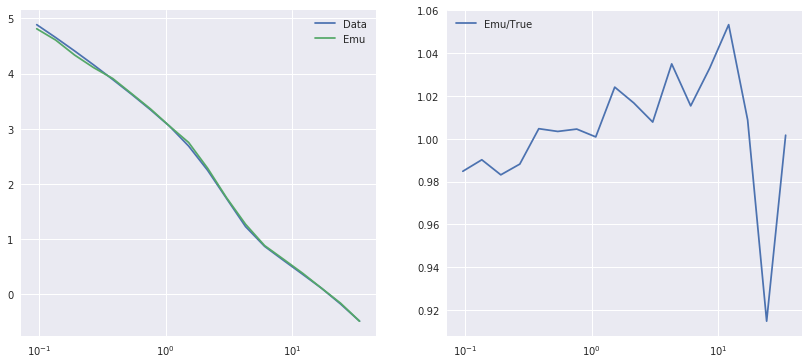

{'logM0': 13.84924924924925, 'sigma_logM': 0.08328328328328329, 'alpha': 0.8872872872872873, 'logM1': 13.856756756756756}


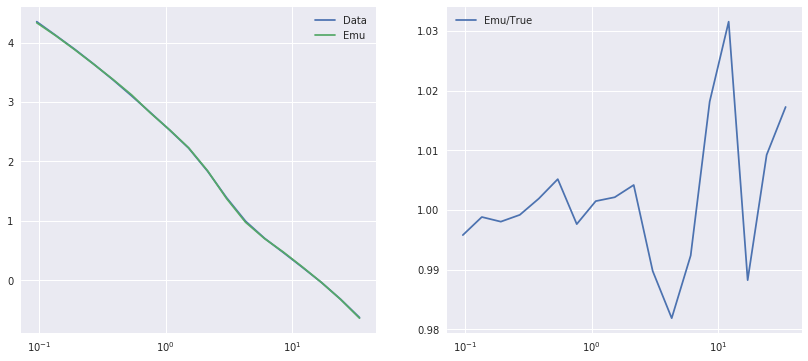

{'logM0': 13.563963963963964, 'sigma_logM': 0.28623623623623623, 'alpha': 0.8852852852852853, 'logM1': 13.955855855855855}


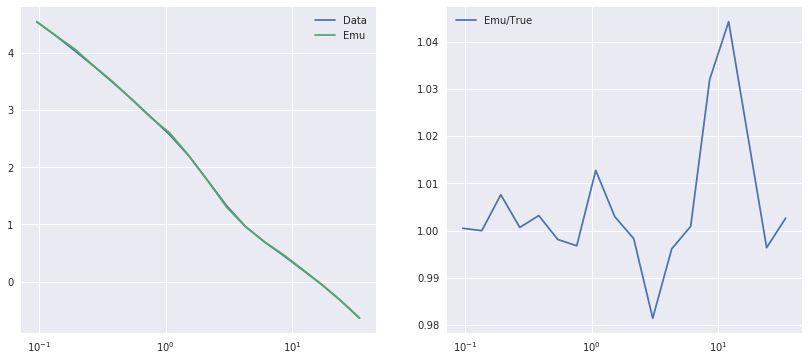

{'logM0': 14.062462462462463, 'sigma_logM': 0.18413413413413415, 'alpha': 0.8424424424424425, 'logM1': 14.173573573573574}


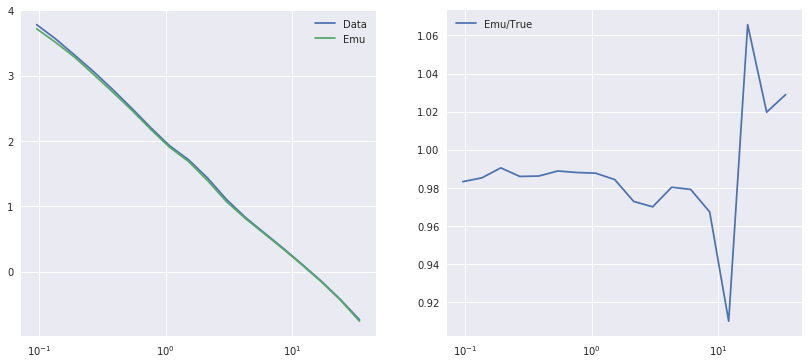

{'logM0': 13.595495495495495, 'sigma_logM': 0.22542542542542543, 'alpha': 0.990990990990991, 'logM1': 13.37927927927928}


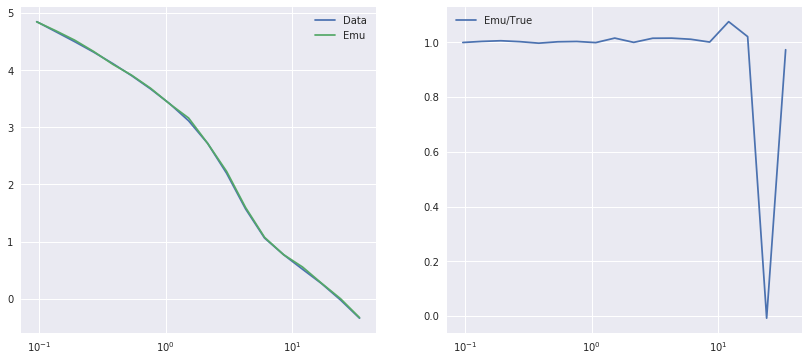

{'logM0': 13.79069069069069, 'sigma_logM': 0.18188188188188187, 'alpha': 0.914914914914915, 'logM1': 13.353753753753754}


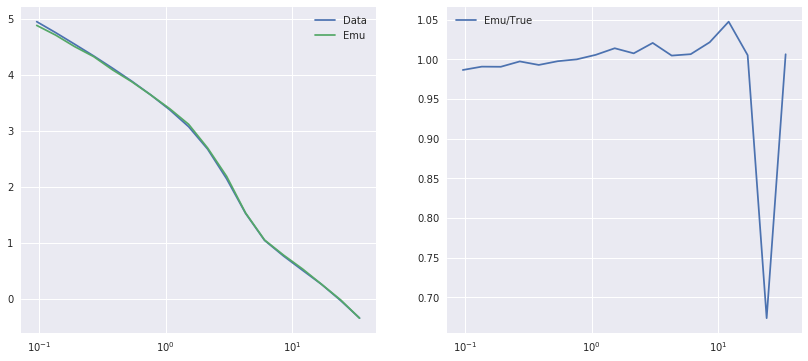

{'logM0': 14.096996996996996, 'sigma_logM': 0.22467467467467467, 'alpha': 0.8456456456456457, 'logM1': 14.32072072072072}


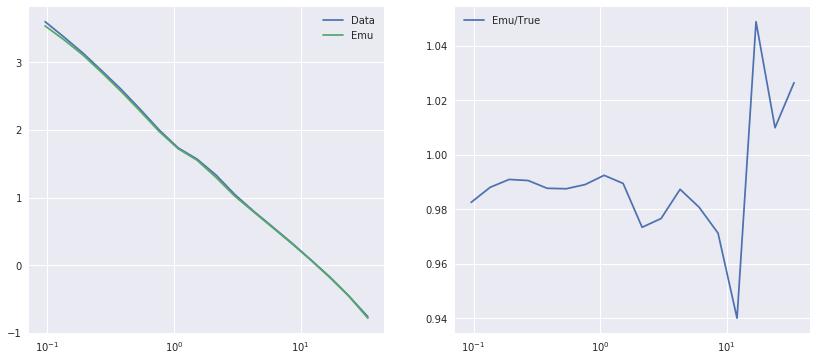

{'logM0': 14.335735735735735, 'sigma_logM': 0.1836336336336336, 'alpha': 1.1039039039039038, 'logM1': 13.966366366366366}


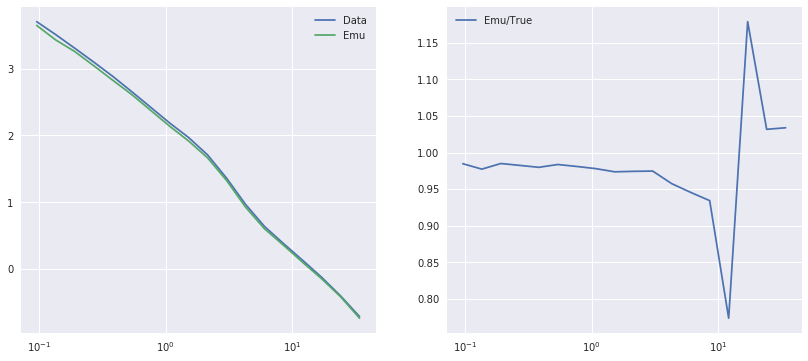

{'logM0': 13.325225225225225, 'sigma_logM': 0.2924924924924925, 'alpha': 0.9101101101101101, 'logM1': 14.002402402402403}


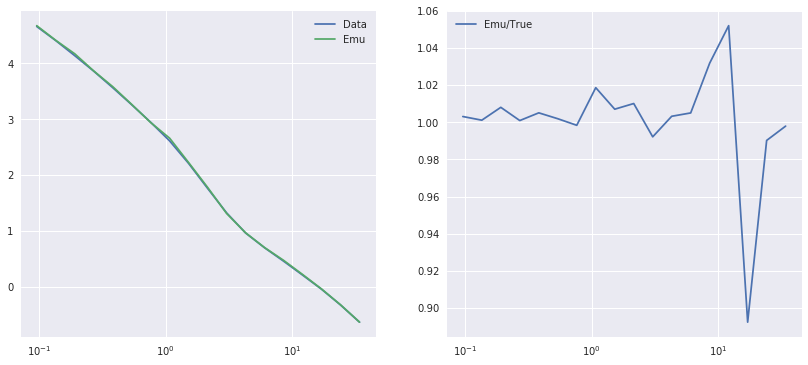

{'logM0': 14.584984984984985, 'sigma_logM': 0.22992992992992994, 'alpha': 1.0714714714714715, 'logM1': 13.754654654654654}


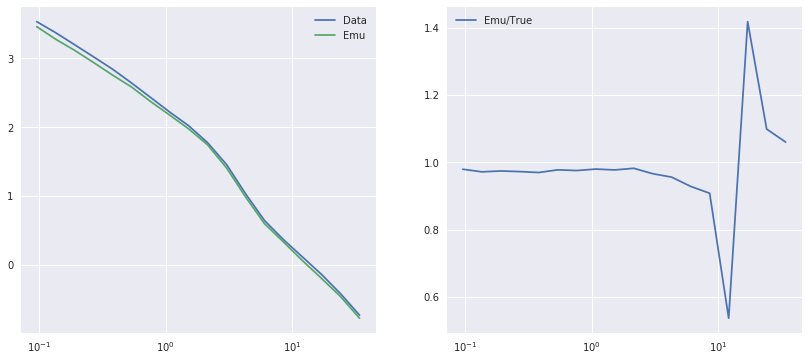

{'logM0': 14.497897897897898, 'sigma_logM': 0.24019019019019017, 'alpha': 1.047847847847848, 'logM1': 13.19159159159159}


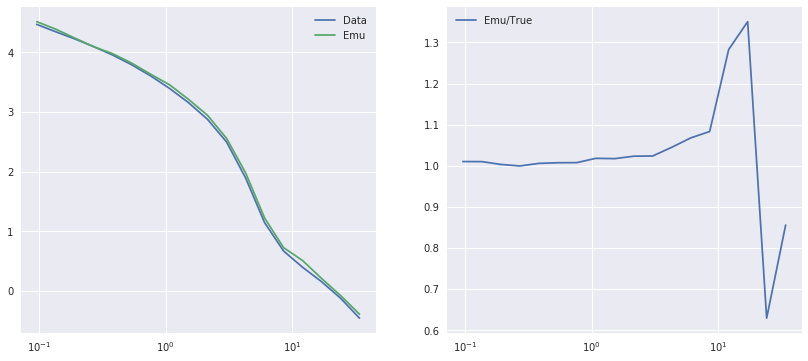

{'logM0': 13.747147147147146, 'sigma_logM': 0.2842342342342342, 'alpha': 0.8332332332332333, 'logM1': 14.18108108108108}


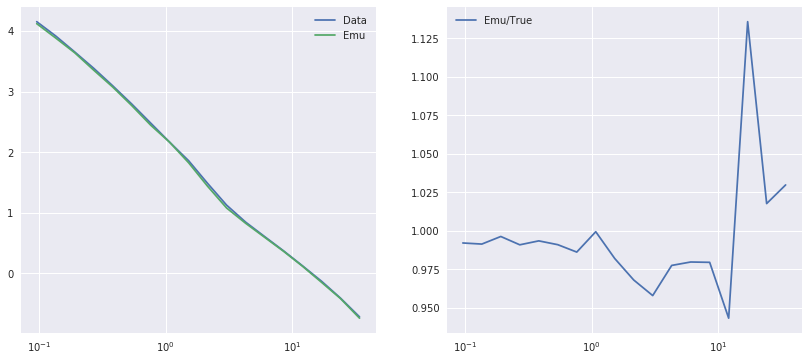

{'logM0': 13.52042042042042, 'sigma_logM': 0.05225225225225225, 'alpha': 1.0766766766766767, 'logM1': 13.897297297297296}


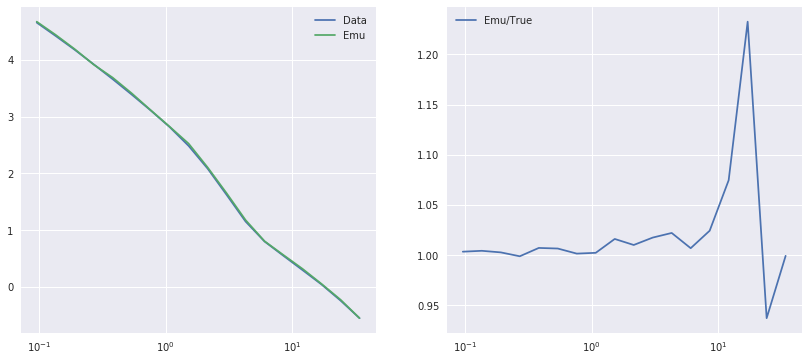

{'logM0': 13.12102102102102, 'sigma_logM': 0.1581081081081081, 'alpha': 0.9885885885885886, 'logM1': 13.314714714714714}


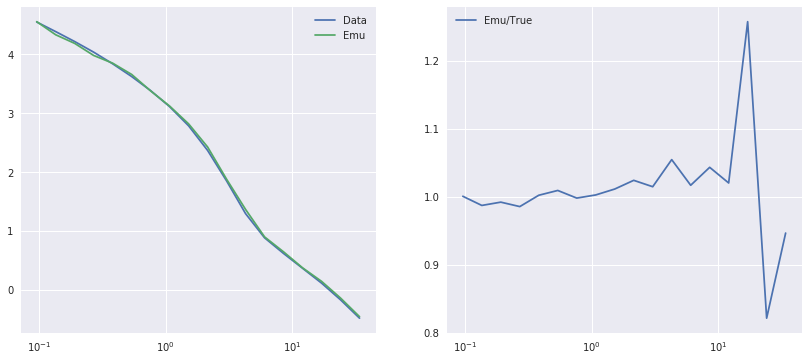

{'logM0': 14.01141141141141, 'sigma_logM': 0.12032032032032032, 'alpha': 1.1115115115115115, 'logM1': 14.52042042042042}


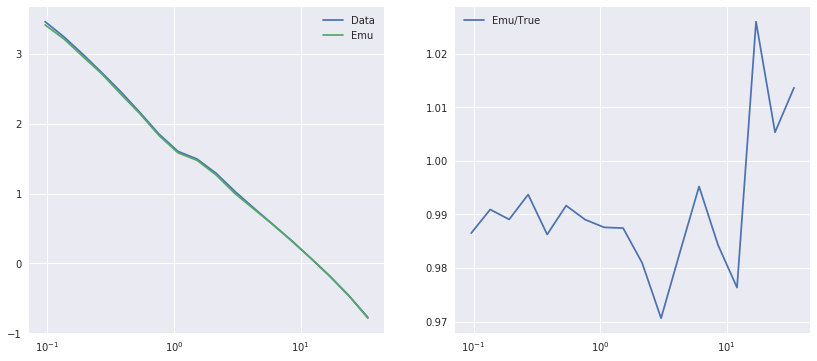

{'logM0': 13.62102102102102, 'sigma_logM': 0.14134134134134135, 'alpha': 0.8432432432432433, 'logM1': 13.527927927927928}


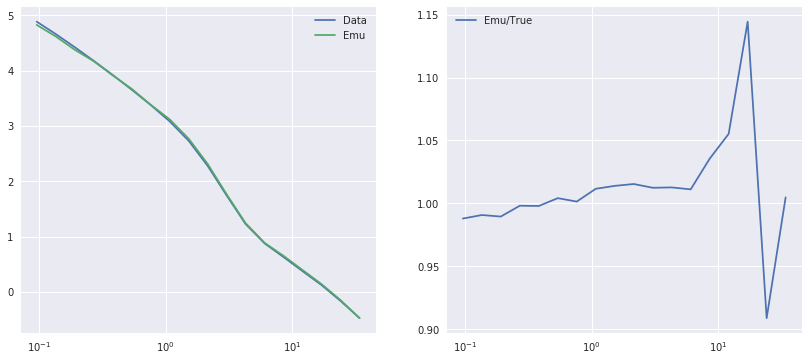

{'logM0': 14.457357357357356, 'sigma_logM': 0.18888888888888888, 'alpha': 0.9377377377377377, 'logM1': 13.606006006006005}


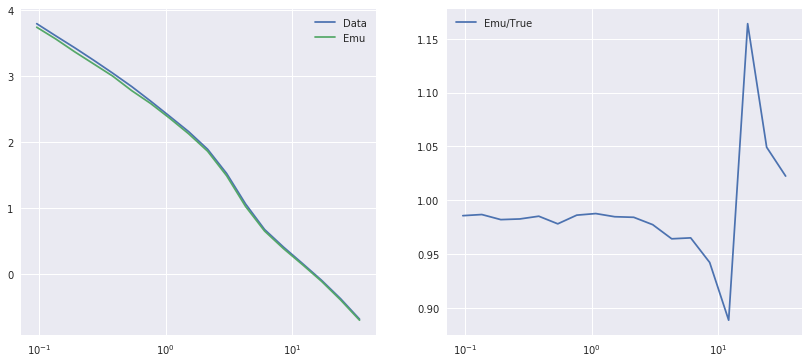

{'logM0': 13.145045045045045, 'sigma_logM': 0.20290290290290292, 'alpha': 1.0734734734734734, 'logM1': 14.34174174174174}


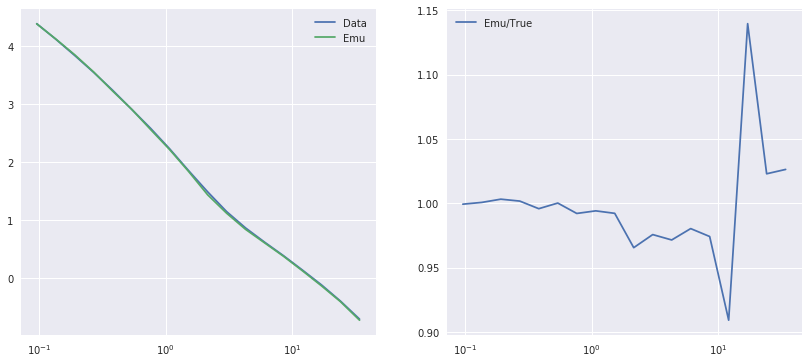

{'logM0': 13.895795795795795, 'sigma_logM': 0.2256756756756757, 'alpha': 0.9797797797797798, 'logM1': 14.19009009009009}


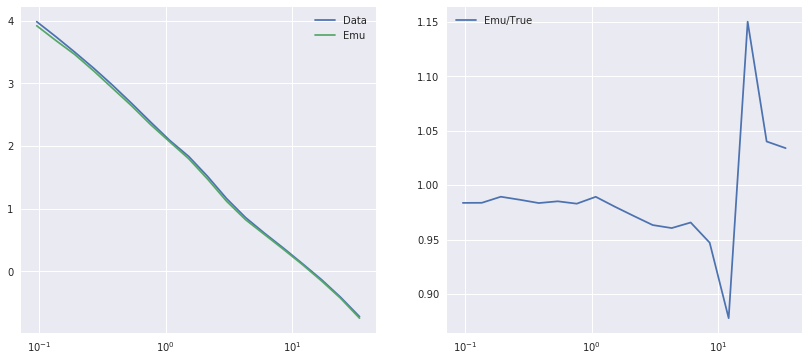

{'logM0': 14.197597597597596, 'sigma_logM': 0.26021021021021024, 'alpha': 0.8660660660660661, 'logM1': 13.66006006006006}


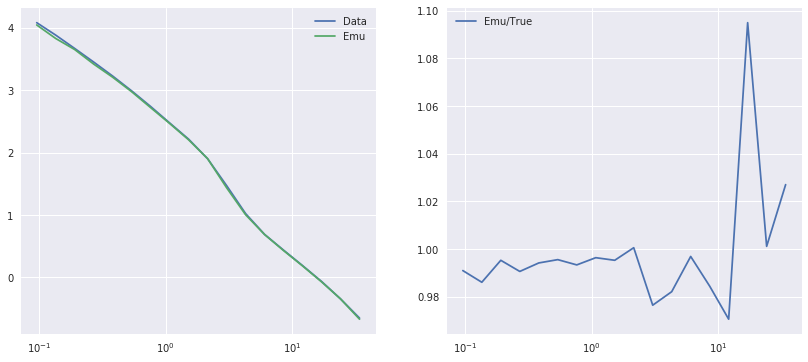

{'logM0': 14.17957957957958, 'sigma_logM': 0.29774774774774776, 'alpha': 0.9925925925925926, 'logM1': 14.032432432432433}


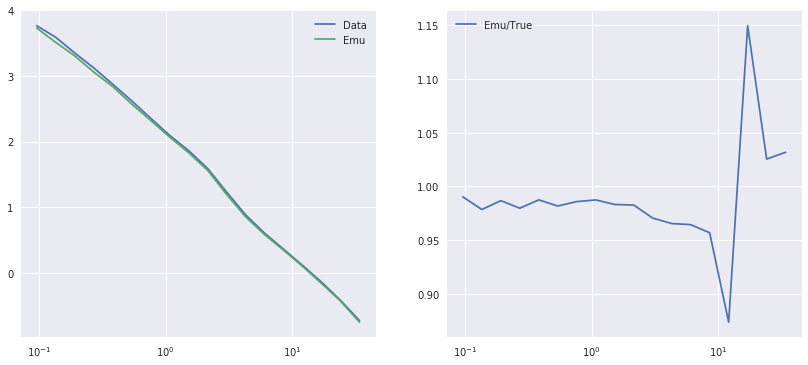

{'logM0': 14.43033033033033, 'sigma_logM': 0.18488488488488486, 'alpha': 0.9021021021021021, 'logM1': 13.253153153153153}


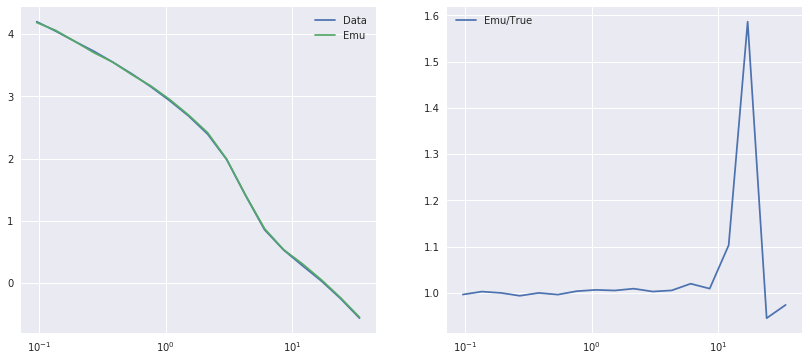

{'logM0': 13.834234234234234, 'sigma_logM': 0.052752752752752756, 'alpha': 0.944944944944945, 'logM1': 14.272672672672673}


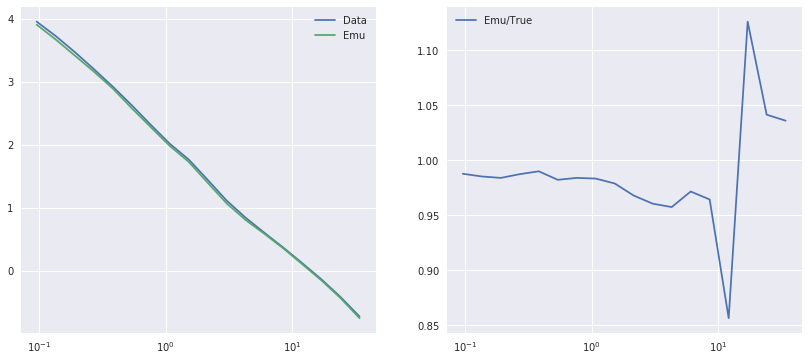

{'logM0': 14.262162162162161, 'sigma_logM': 0.2672172172172172, 'alpha': 0.932932932932933, 'logM1': 13.458858858858859}


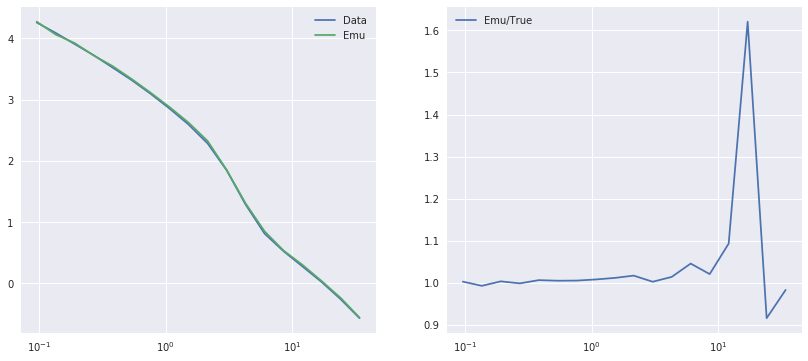

{'logM0': 14.418318318318319, 'sigma_logM': 0.18963963963963965, 'alpha': 0.8180180180180181, 'logM1': 13.612012012012011}


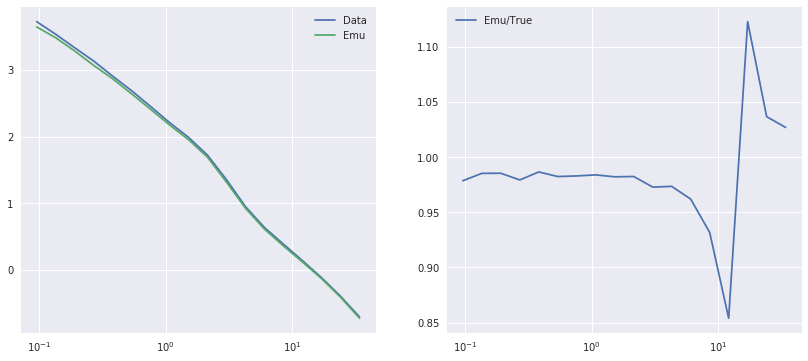

{'logM0': 14.374774774774774, 'sigma_logM': 0.256956956956957, 'alpha': 0.9133133133133133, 'logM1': 14.49189189189189}


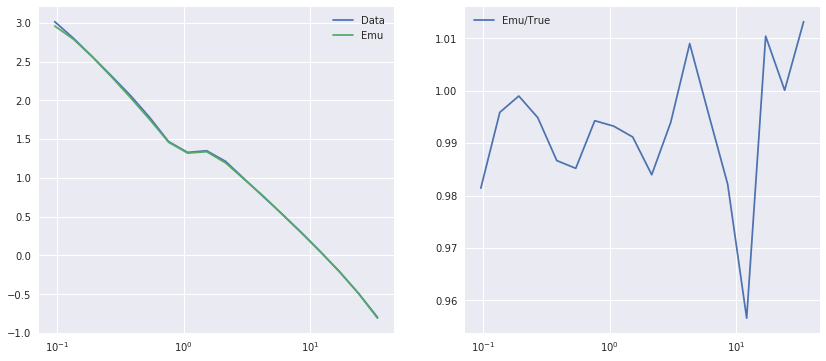

{'logM0': 14.093993993993994, 'sigma_logM': 0.05425425425425426, 'alpha': 0.9633633633633634, 'logM1': 13.533933933933934}


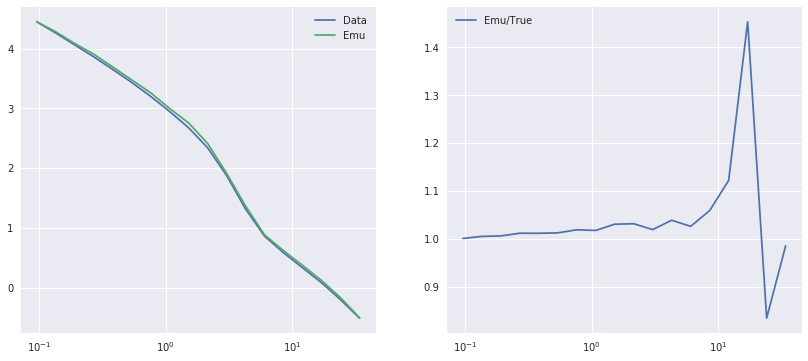

{'logM0': 13.702102102102101, 'sigma_logM': 0.09954954954954956, 'alpha': 1.1067067067067067, 'logM1': 13.53093093093093}


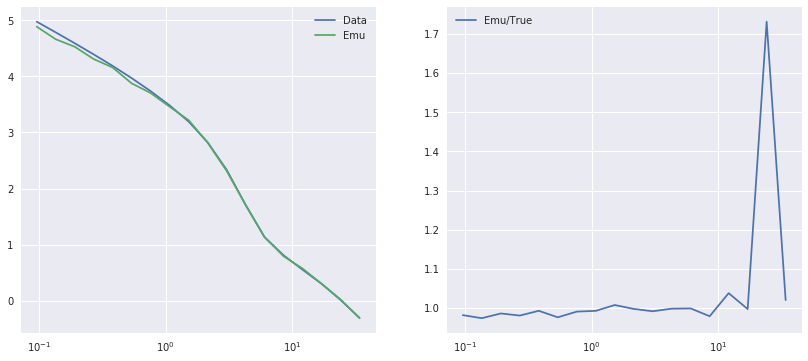

{'logM0': 14.368768768768769, 'sigma_logM': 0.17037037037037037, 'alpha': 1.1219219219219219, 'logM1': 13.62102102102102}


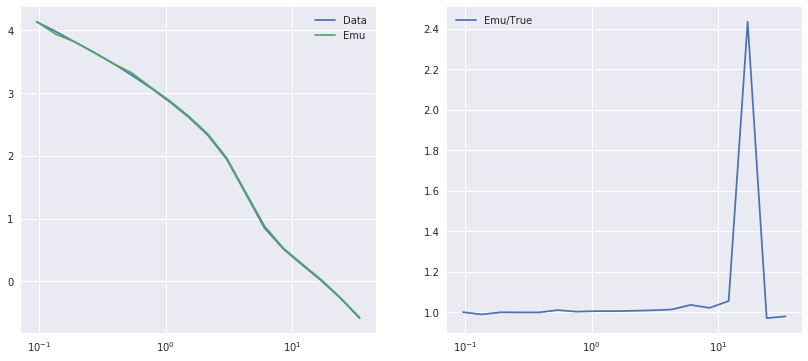

{'logM0': 13.916816816816816, 'sigma_logM': 0.09104104104104105, 'alpha': 1.0558558558558557, 'logM1': 13.184084084084084}


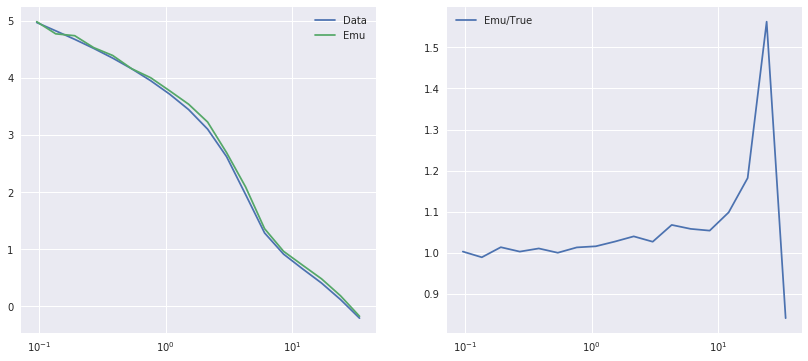

{'logM0': 13.496396396396396, 'sigma_logM': 0.12982982982982982, 'alpha': 1.1007007007007008, 'logM1': 14.21111111111111}


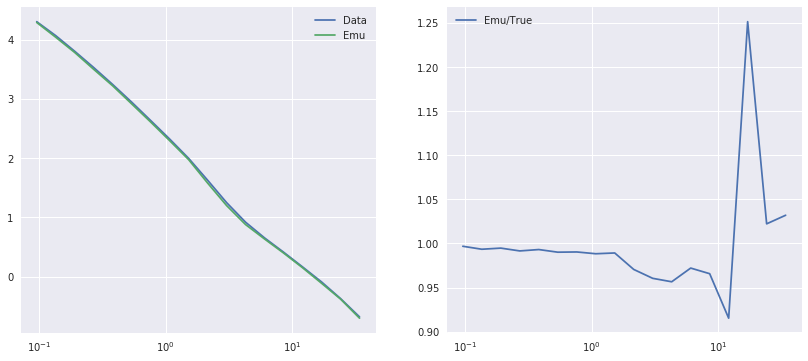

{'logM0': 13.296696696696696, 'sigma_logM': 0.2964964964964965, 'alpha': 0.8284284284284285, 'logM1': 13.245645645645645}


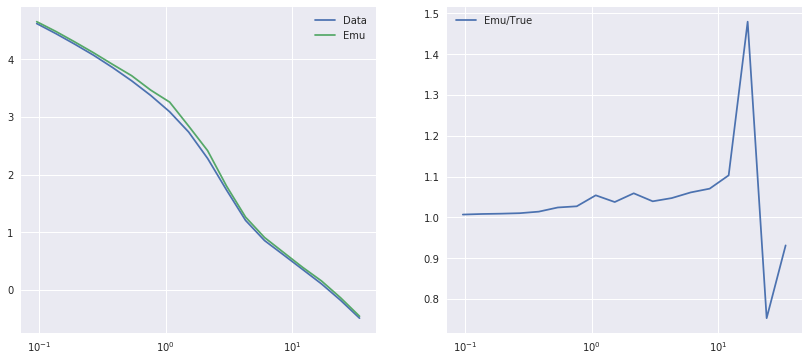

{'logM0': 13.247147147147146, 'sigma_logM': 0.20715715715715716, 'alpha': 0.9121121121121121, 'logM1': 13.398798798798799}


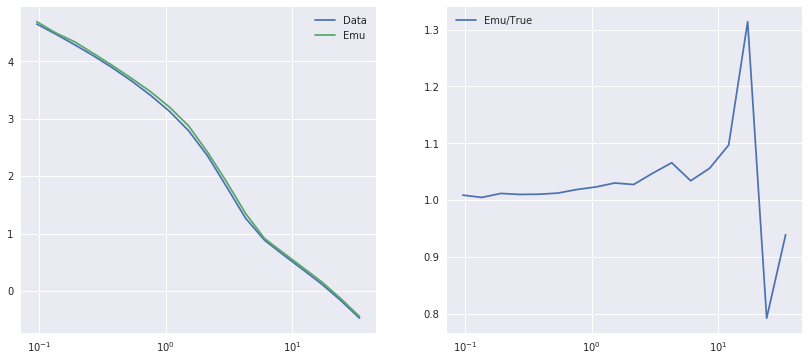

{'logM0': 13.727627627627626, 'sigma_logM': 0.1475975975975976, 'alpha': 1.027027027027027, 'logM1': 13.392792792792793}


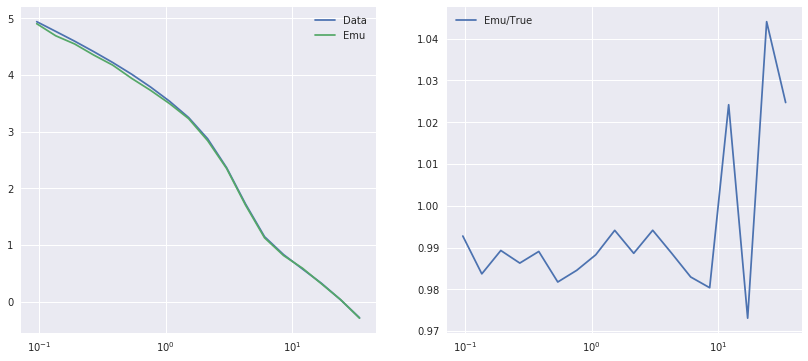

{'logM0': 13.95135135135135, 'sigma_logM': 0.22767767767767766, 'alpha': 1.1587587587587587, 'logM1': 13.262162162162161}


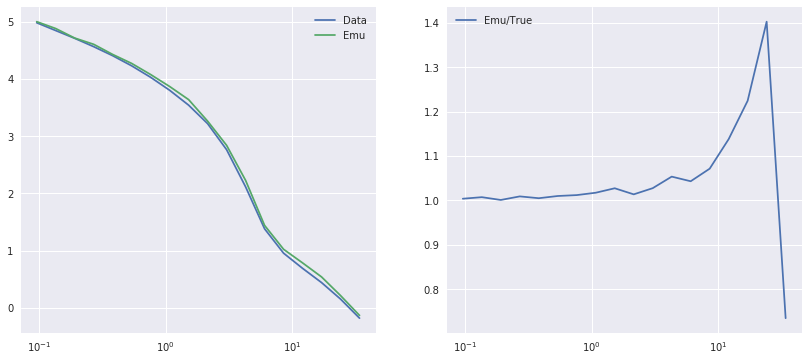

{'logM0': 14.413813813813814, 'sigma_logM': 0.14709709709709712, 'alpha': 1.0814814814814815, 'logM1': 14.226126126126125}


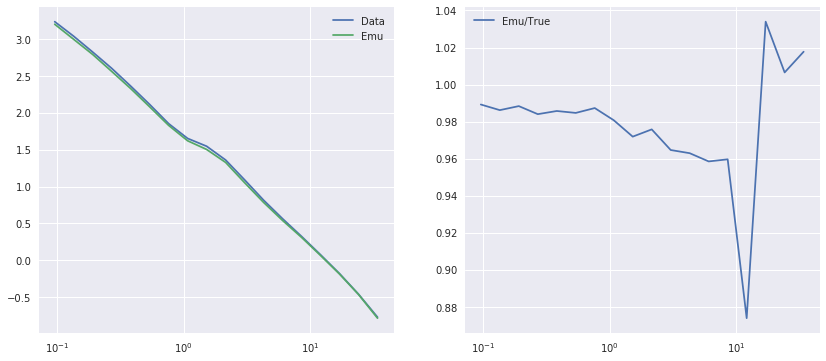

{'logM0': 14.283183183183183, 'sigma_logM': 0.2954954954954955, 'alpha': 1.0998998998999, 'logM1': 14.107507507507506}


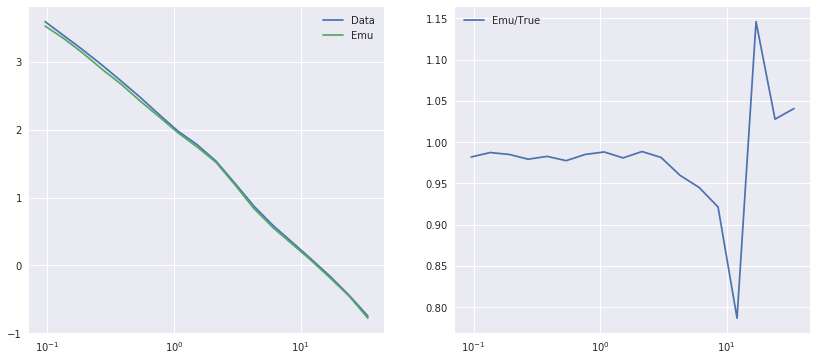

{'logM0': 13.44084084084084, 'sigma_logM': 0.14884884884884886, 'alpha': 1.157957957957958, 'logM1': 13.96186186186186}


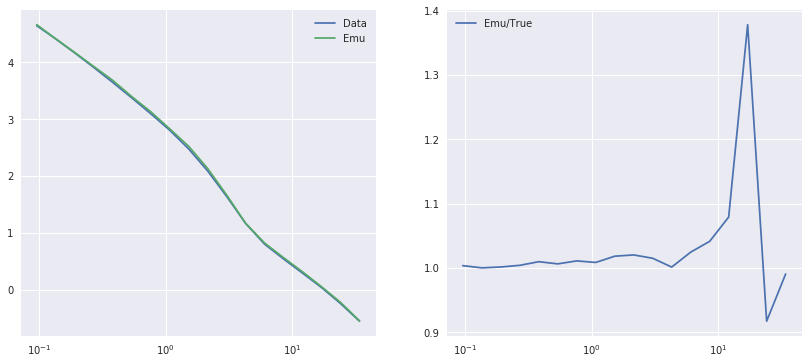

{'logM0': 13.43033033033033, 'sigma_logM': 0.2692192192192192, 'alpha': 0.9441441441441442, 'logM1': 13.128528528528529}


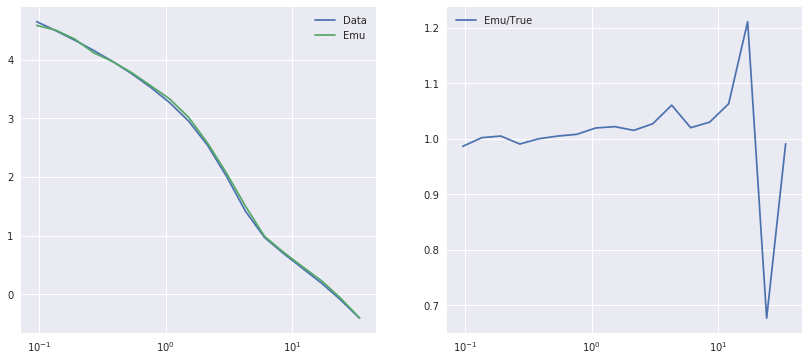

{'logM0': 13.187087087087086, 'sigma_logM': 0.06476476476476477, 'alpha': 1.1195195195195196, 'logM1': 13.551951951951951}


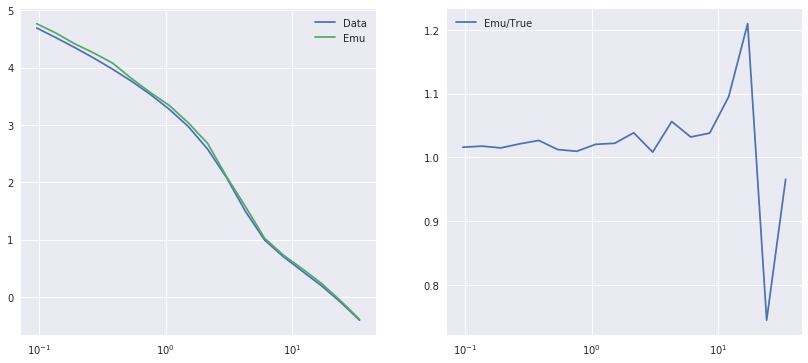

{'logM0': 14.164564564564564, 'sigma_logM': 0.1706206206206206, 'alpha': 1.1423423423423422, 'logM1': 13.142042042042041}


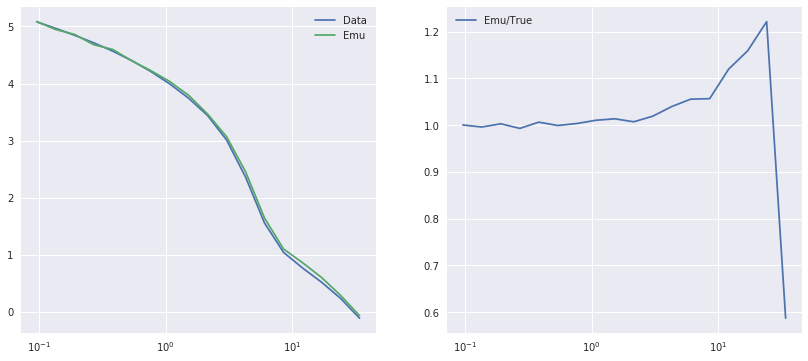

{'logM0': 13.756156156156155, 'sigma_logM': 0.25295295295295295, 'alpha': 1.0066066066066066, 'logM1': 14.458858858858859}


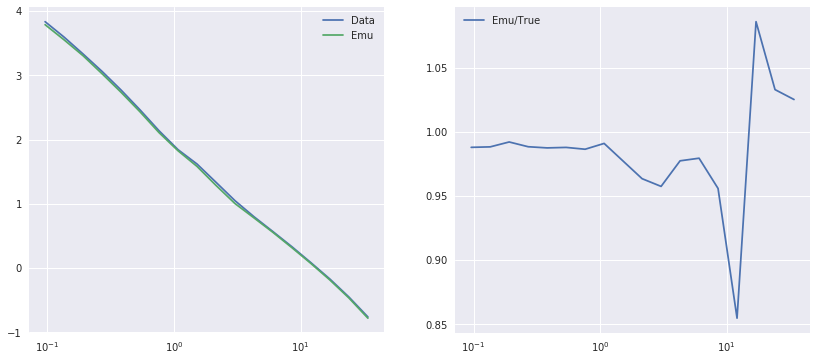

{'logM0': 13.548948948948949, 'sigma_logM': 0.20415415415415417, 'alpha': 1.1667667667667667, 'logM1': 13.71111111111111}


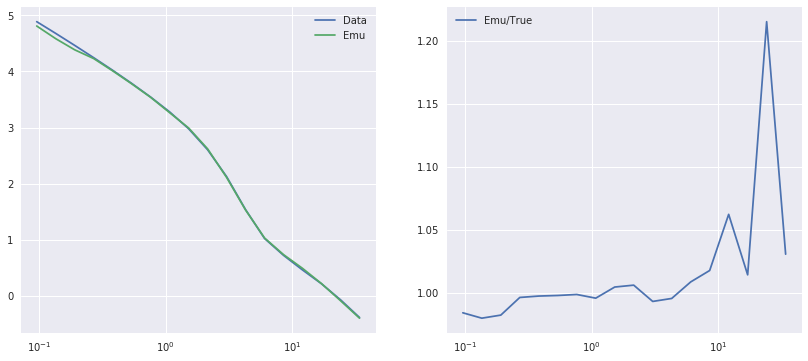

{'logM0': 13.173573573573574, 'sigma_logM': 0.07077077077077078, 'alpha': 1.0686686686686686, 'logM1': 13.31921921921922}


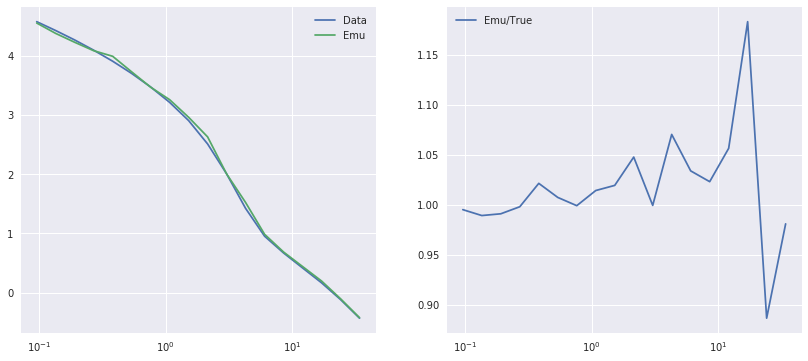

{'logM0': 14.002402402402403, 'sigma_logM': 0.10330330330330331, 'alpha': 0.816016016016016, 'logM1': 13.876276276276275}


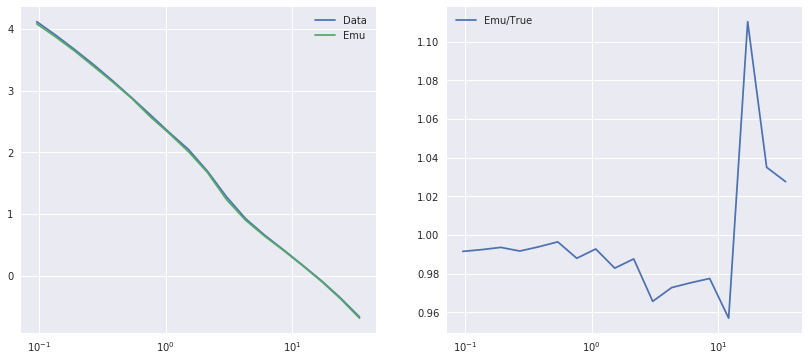

{'logM0': 14.238138138138138, 'sigma_logM': 0.24969969969969968, 'alpha': 0.842042042042042, 'logM1': 13.984384384384384}


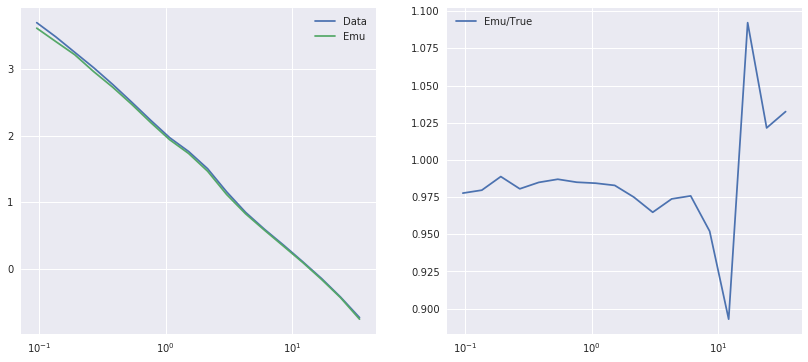

{'logM0': 13.178078078078078, 'sigma_logM': 0.19739739739739742, 'alpha': 0.8480480480480481, 'logM1': 13.4018018018018}


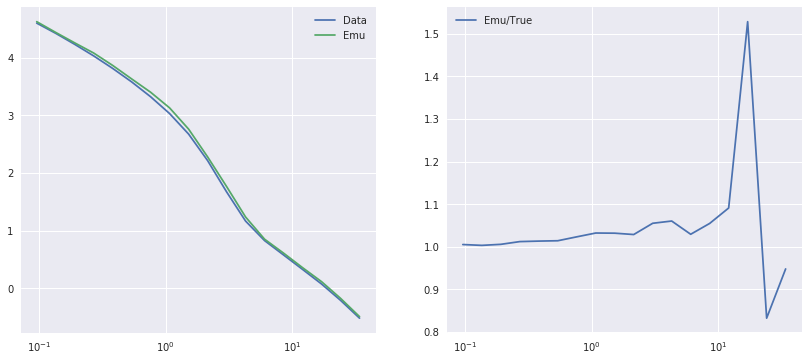

{'logM0': 13.454354354354354, 'sigma_logM': 0.15685685685685685, 'alpha': 1.1795795795795796, 'logM1': 13.34924924924925}


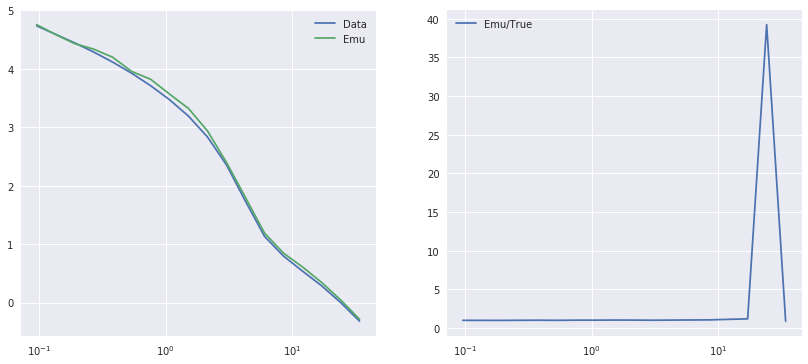

{'logM0': 13.798198198198198, 'sigma_logM': 0.05825825825825826, 'alpha': 0.9505505505505506, 'logM1': 13.759159159159159}


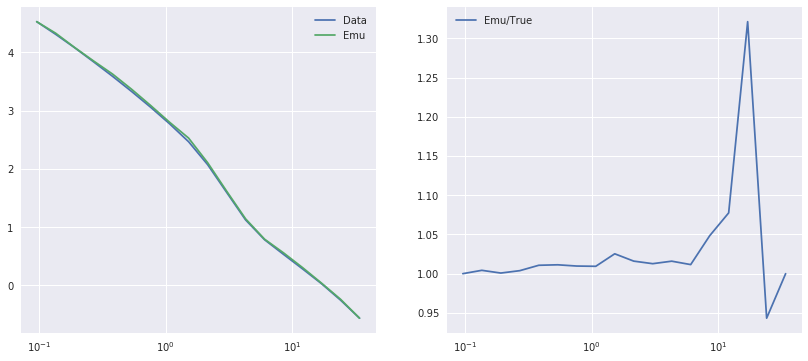

{'logM0': 13.744144144144144, 'sigma_logM': 0.24244244244244245, 'alpha': 1.0522522522522522, 'logM1': 13.386786786786786}


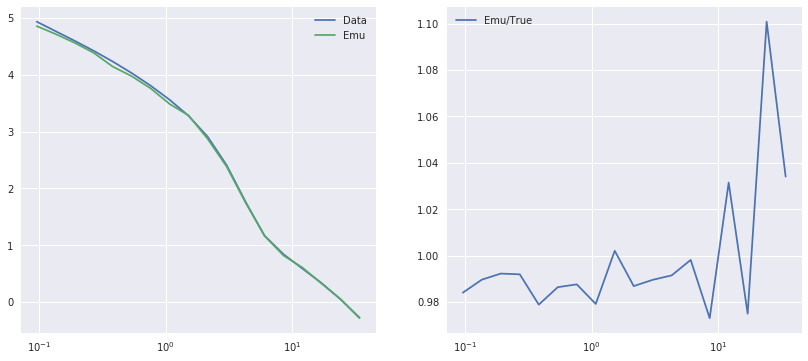

{'logM0': 14.575975975975975, 'sigma_logM': 0.26546546546546546, 'alpha': 0.9045045045045045, 'logM1': 14.44084084084084}


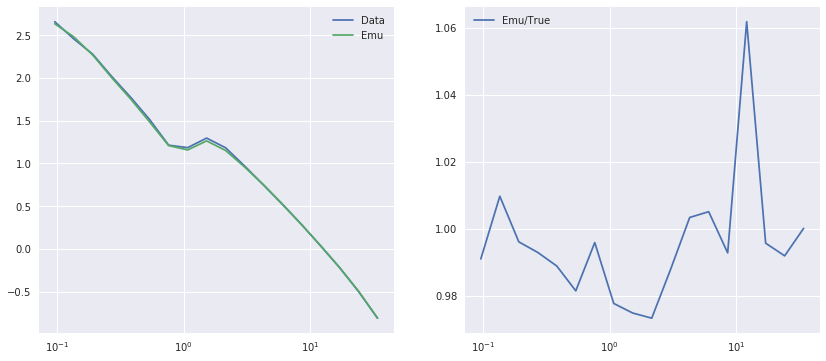

{'logM0': 13.828228228228229, 'sigma_logM': 0.23343343343343342, 'alpha': 0.9197197197197198, 'logM1': 13.23963963963964}


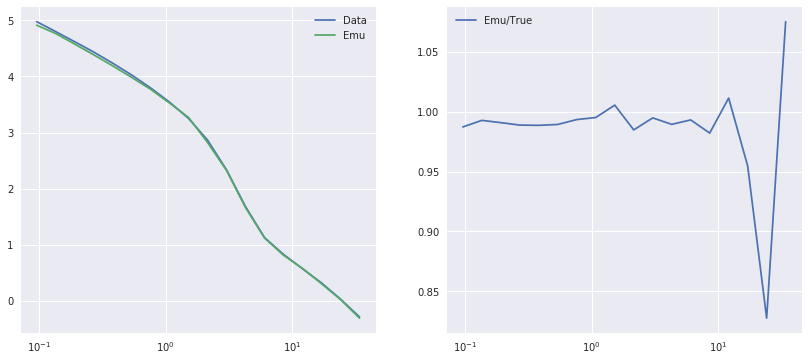

{'logM0': 13.524924924924925, 'sigma_logM': 0.1811311311311311, 'alpha': 1.1359359359359358, 'logM1': 14.28918918918919}


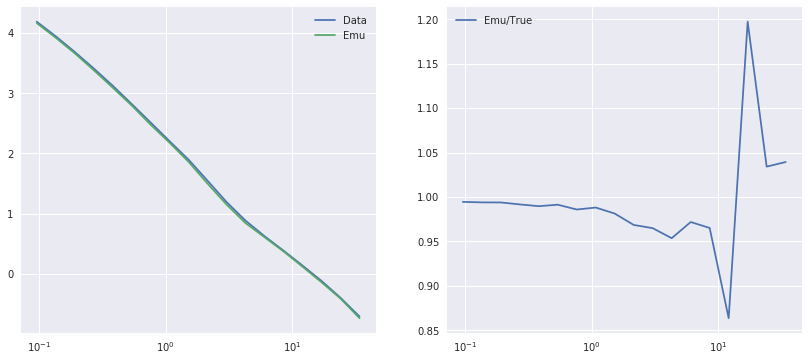

{'logM0': 13.606006006006005, 'sigma_logM': 0.0967967967967968, 'alpha': 0.9877877877877878, 'logM1': 14.554954954954955}


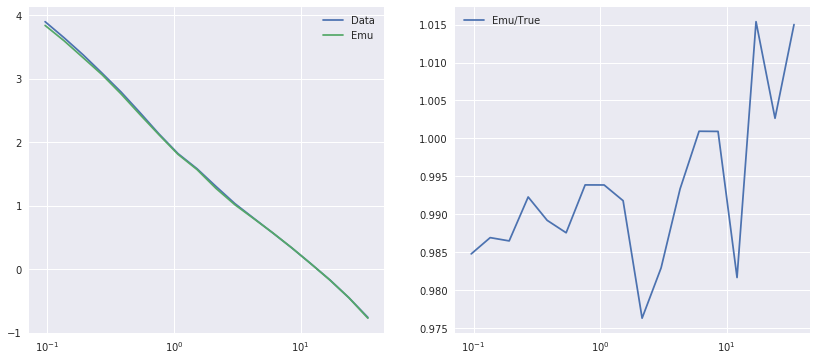

{'logM0': 13.172072072072071, 'sigma_logM': 0.2562062062062062, 'alpha': 1.1539539539539538, 'logM1': 13.296696696696696}


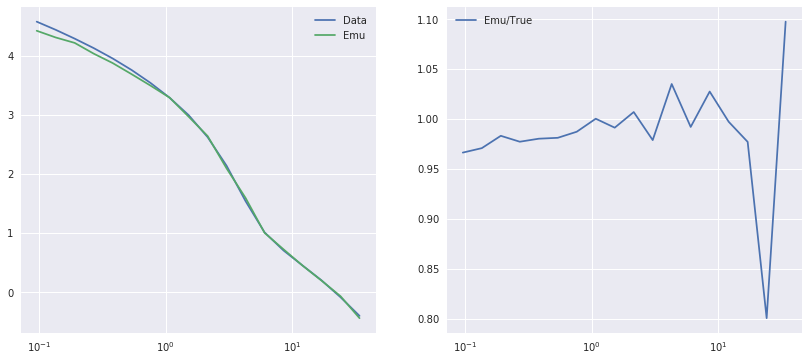

{'logM0': 13.55945945945946, 'sigma_logM': 0.06001001001001001, 'alpha': 1.0962962962962963, 'logM1': 13.317717717717718}


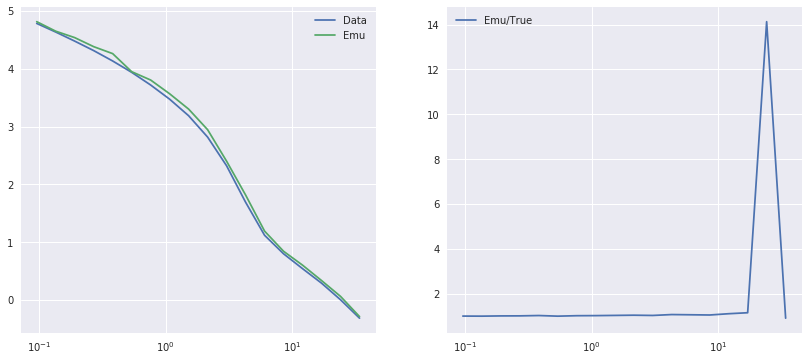

{'logM0': 13.915315315315315, 'sigma_logM': 0.2772272272272272, 'alpha': 0.8476476476476477, 'logM1': 14.06096096096096}


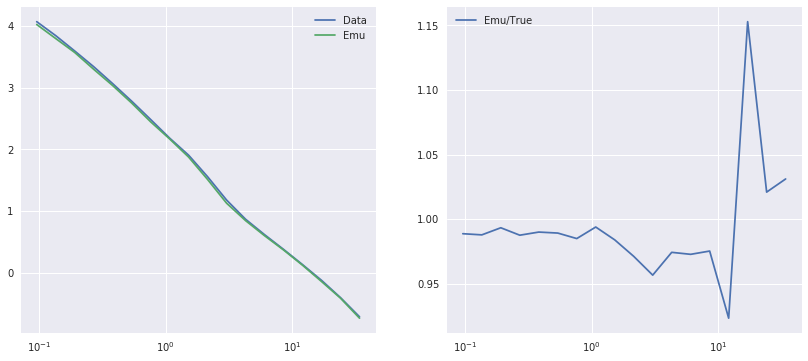

{'logM0': 13.577477477477476, 'sigma_logM': 0.19714714714714715, 'alpha': 0.9517517517517518, 'logM1': 14.003903903903904}


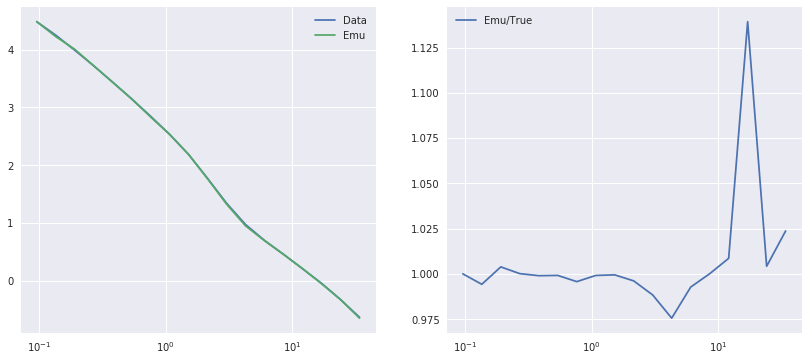

{'logM0': 13.598498498498499, 'sigma_logM': 0.051501501501501505, 'alpha': 0.8792792792792793, 'logM1': 13.34174174174174}


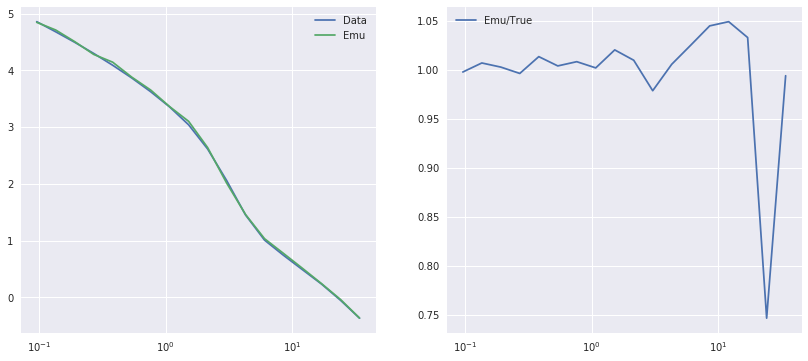

{'logM0': 14.14054054054054, 'sigma_logM': 0.12407407407407407, 'alpha': 1.0534534534534534, 'logM1': 13.56996996996997}


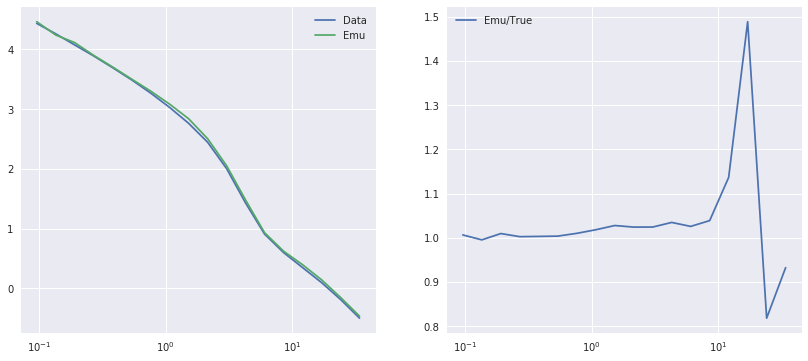

{'logM0': 13.745645645645645, 'sigma_logM': 0.1908908908908909, 'alpha': 1.1519519519519519, 'logM1': 14.265165165165165}


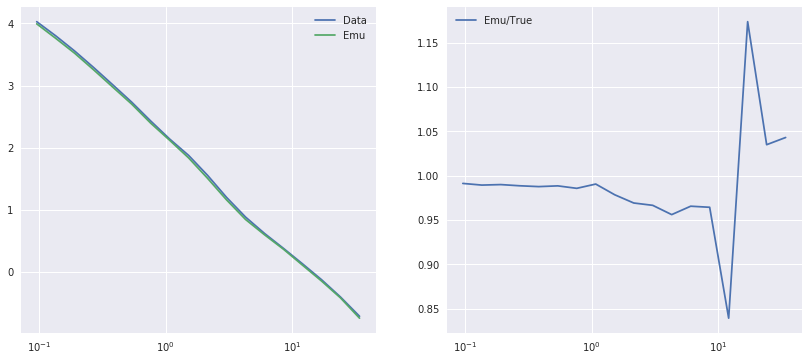

{'logM0': 13.515915915915915, 'sigma_logM': 0.27247247247247247, 'alpha': 1.193993993993994, 'logM1': 14.122522522522523}


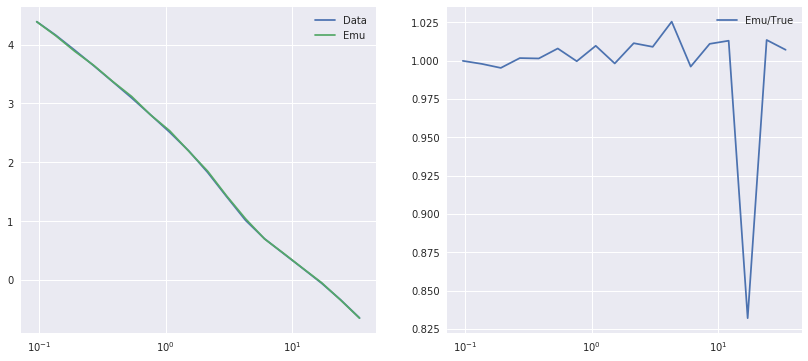

{'logM0': 13.72012012012012, 'sigma_logM': 0.16461461461461463, 'alpha': 0.8216216216216217, 'logM1': 14.583483483483484}


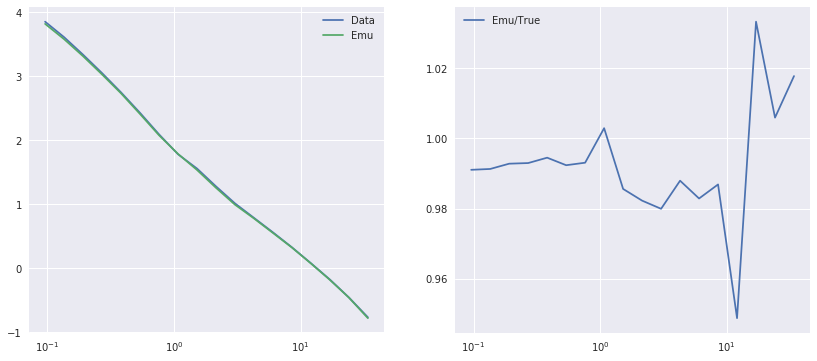

{'logM0': 13.67957957957958, 'sigma_logM': 0.10480480480480481, 'alpha': 1.1339339339339338, 'logM1': 14.47987987987988}


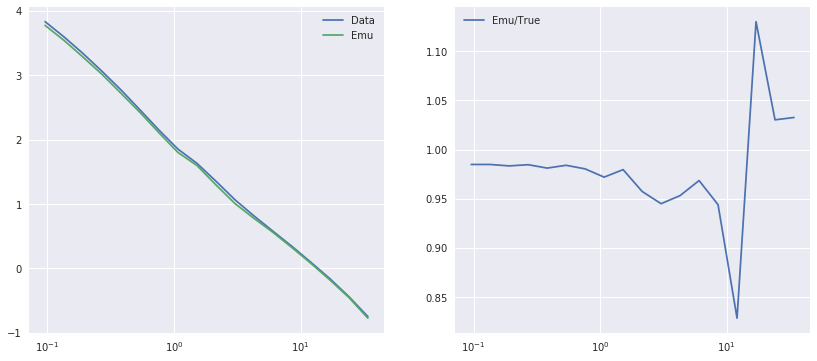

{'logM0': 13.154054054054054, 'sigma_logM': 0.25745745745745746, 'alpha': 1.0318318318318318, 'logM1': 13.933333333333334}


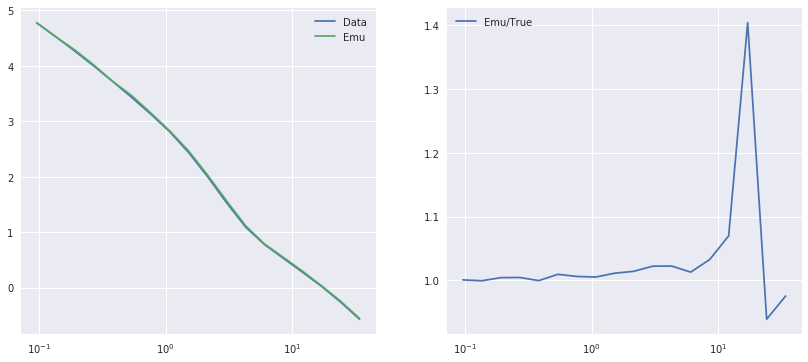

{'logM0': 14.027927927927928, 'sigma_logM': 0.16436436436436436, 'alpha': 1.0774774774774776, 'logM1': 13.113513513513514}


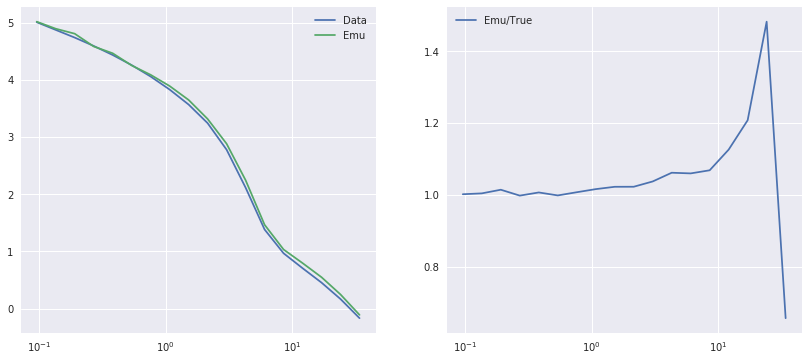

{'logM0': 14.254654654654654, 'sigma_logM': 0.29224224224224227, 'alpha': 0.8188188188188189, 'logM1': 13.46936936936937}


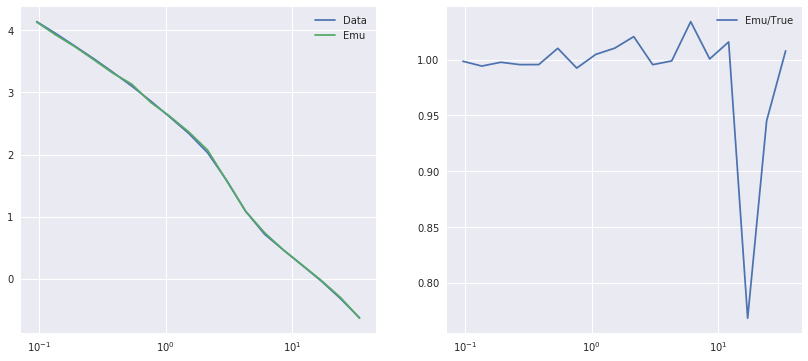

{'logM0': 14.22162162162162, 'sigma_logM': 0.1606106106106106, 'alpha': 0.8740740740740741, 'logM1': 14.35975975975976}


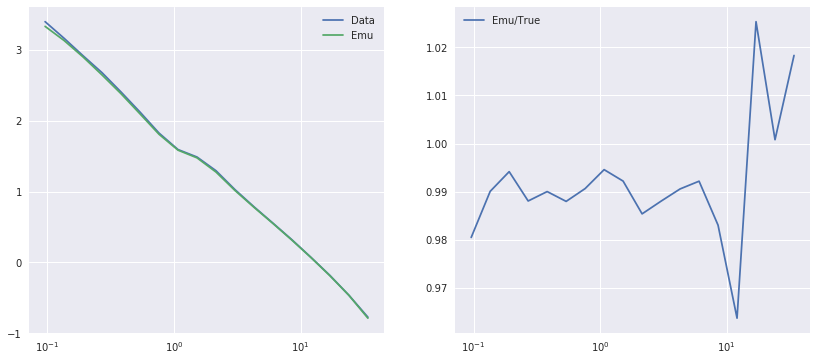

{'logM0': 14.224624624624624, 'sigma_logM': 0.2632132132132132, 'alpha': 1.14994994994995, 'logM1': 13.78018018018018}


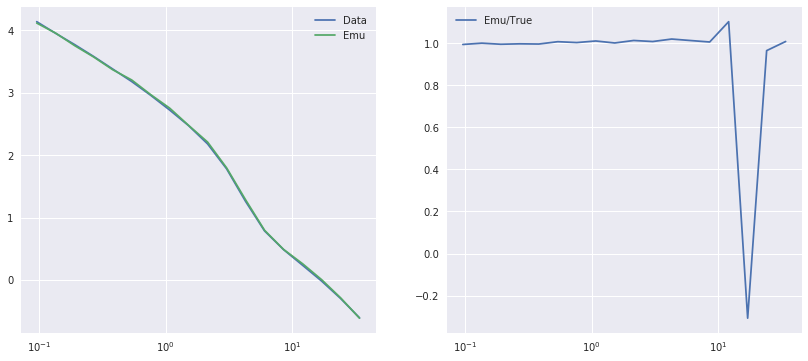

{'logM0': 13.633033033033033, 'sigma_logM': 0.11431431431431431, 'alpha': 0.8472472472472473, 'logM1': 14.395795795795795}


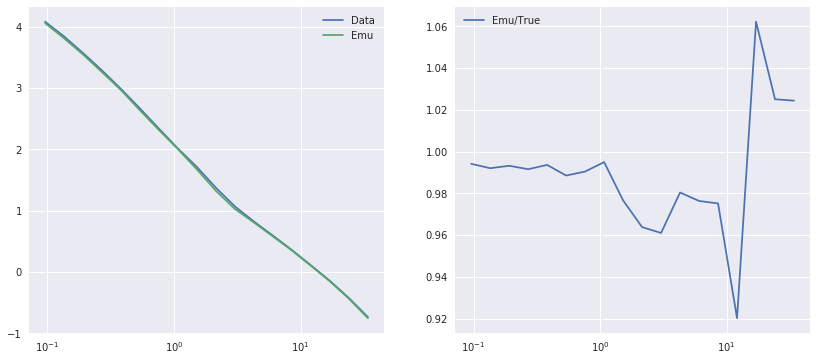

{'logM0': 14.455855855855855, 'sigma_logM': 0.28573573573573574, 'alpha': 1.165165165165165, 'logM1': 13.678078078078078}


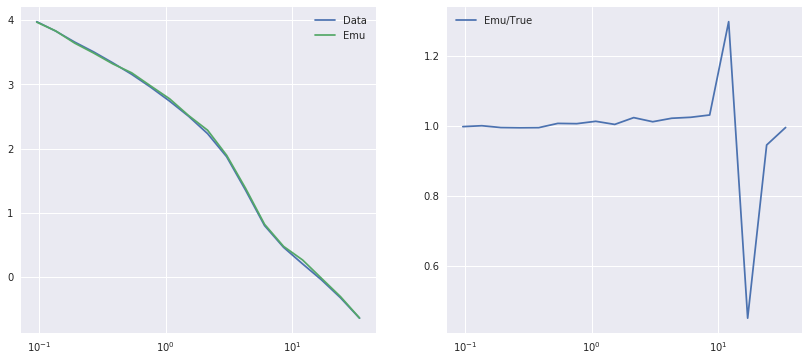

{'logM0': 13.67057057057057, 'sigma_logM': 0.1330830830830831, 'alpha': 0.9233233233233233, 'logM1': 13.278678678678679}


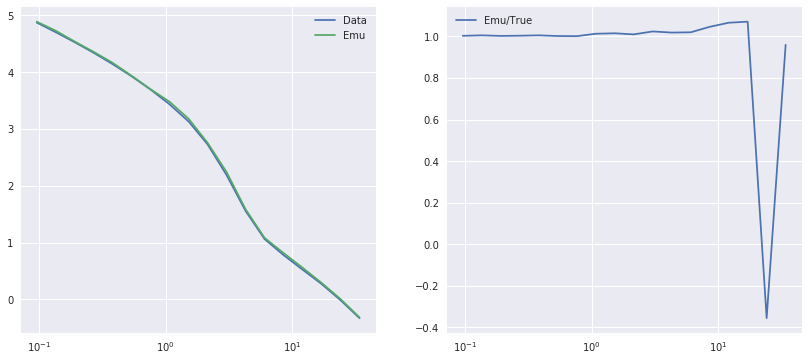

{'logM0': 14.5009009009009, 'sigma_logM': 0.295995995995996, 'alpha': 0.8428428428428428, 'logM1': 14.547447447447446}


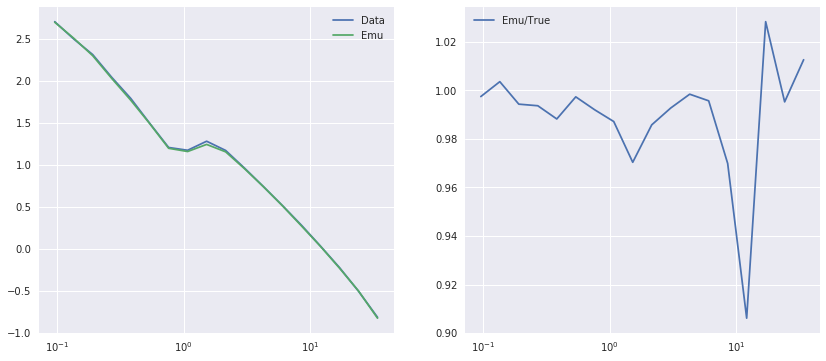

{'logM0': 13.1, 'sigma_logM': 0.05925925925925926, 'alpha': 0.8656656656656657, 'logM1': 13.526426426426426}


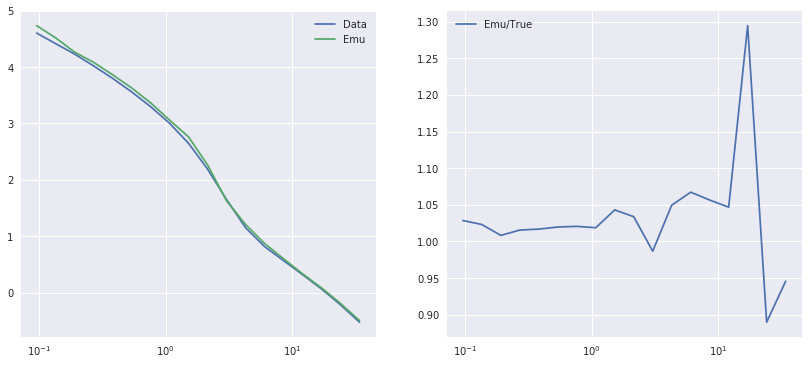

{'logM0': 13.578978978978979, 'sigma_logM': 0.06726726726726727, 'alpha': 1.0626626626626625, 'logM1': 13.868768768768769}


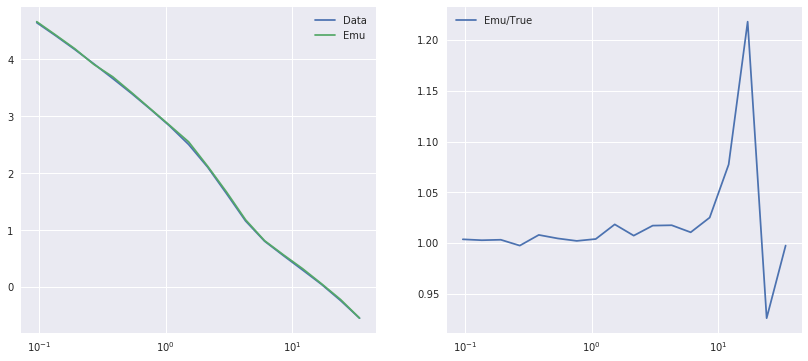

{'logM0': 13.137537537537538, 'sigma_logM': 0.05550550550550551, 'alpha': 1.1427427427427428, 'logM1': 13.657057057057056}


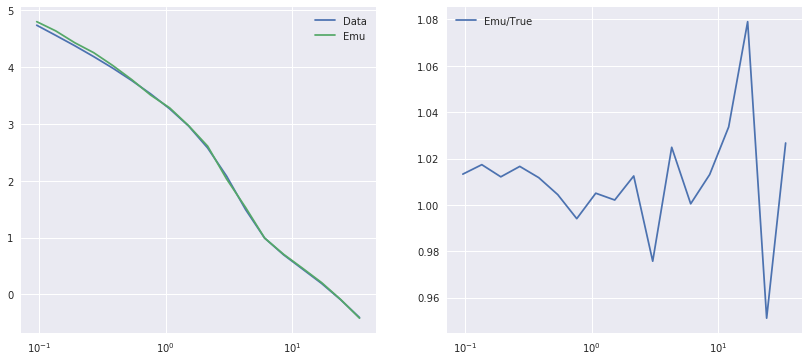

{'logM0': 14.16156156156156, 'sigma_logM': 0.2687187187187187, 'alpha': 1.1787787787787787, 'logM1': 13.122522522522523}


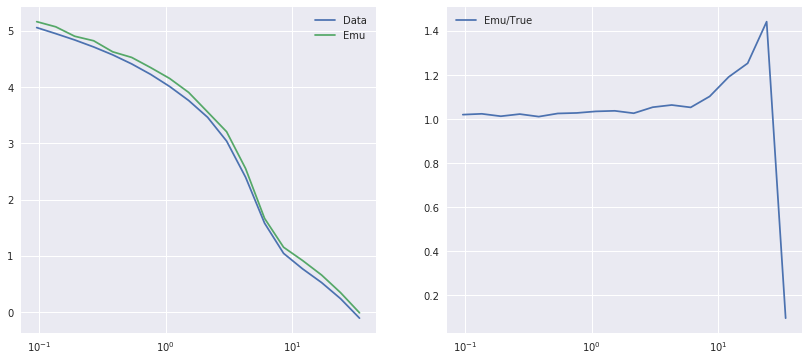

{'logM0': 14.313213213213213, 'sigma_logM': 0.10355355355355356, 'alpha': 0.9637637637637637, 'logM1': 13.49039039039039}


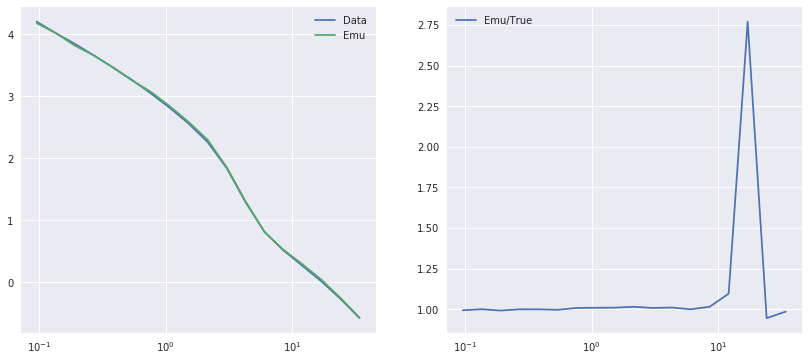

{'logM0': 13.705105105105105, 'sigma_logM': 0.11706706706706707, 'alpha': 1.0078078078078079, 'logM1': 14.14954954954955}


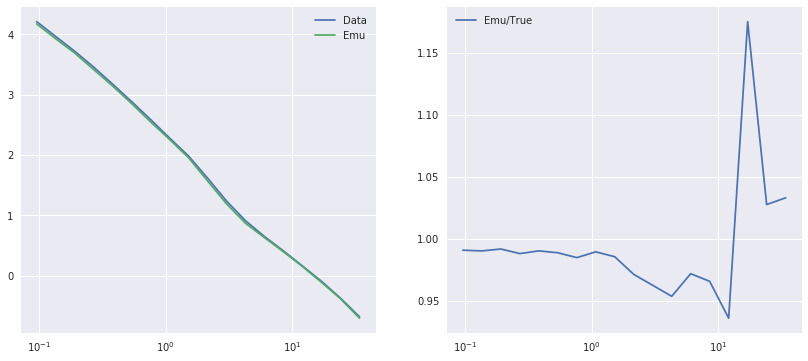

{'logM0': 13.793693693693694, 'sigma_logM': 0.13933933933933934, 'alpha': 0.9421421421421421, 'logM1': 14.367267267267266}


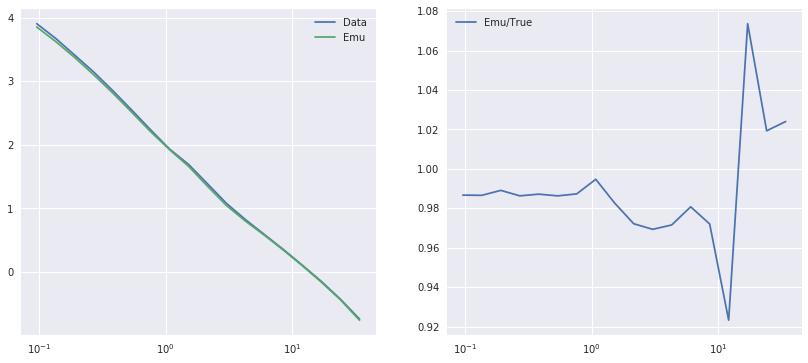

{'logM0': 14.328228228228229, 'sigma_logM': 0.08353353353353354, 'alpha': 0.9145145145145145, 'logM1': 13.642042042042041}


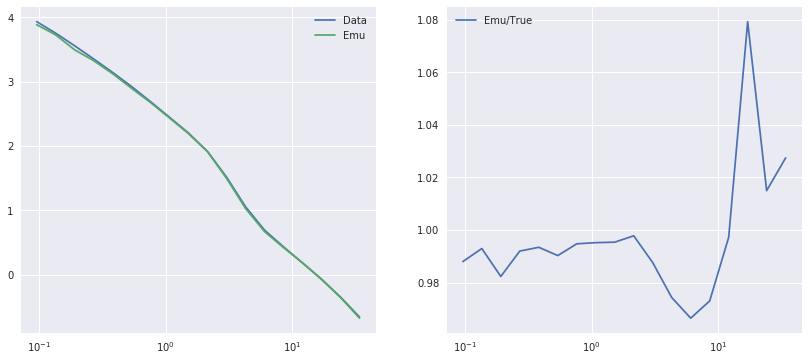

{'logM0': 13.844744744744744, 'sigma_logM': 0.2461961961961962, 'alpha': 0.9941941941941942, 'logM1': 13.226126126126125}


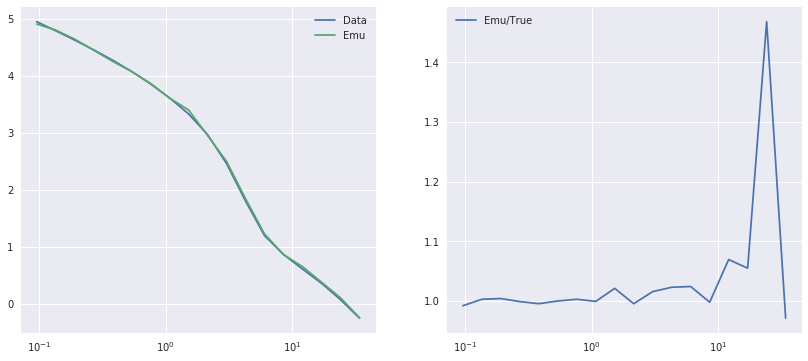

{'logM0': 14.46036036036036, 'sigma_logM': 0.13833833833833833, 'alpha': 0.8664664664664665, 'logM1': 13.727627627627626}


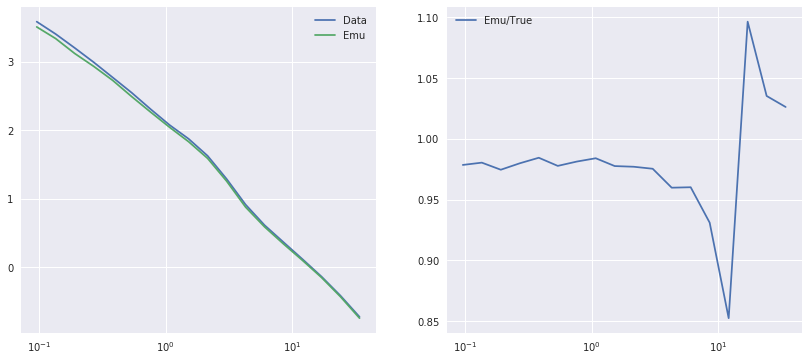

{'logM0': 14.154054054054054, 'sigma_logM': 0.17562562562562561, 'alpha': 1.0538538538538538, 'logM1': 13.898798798798799}


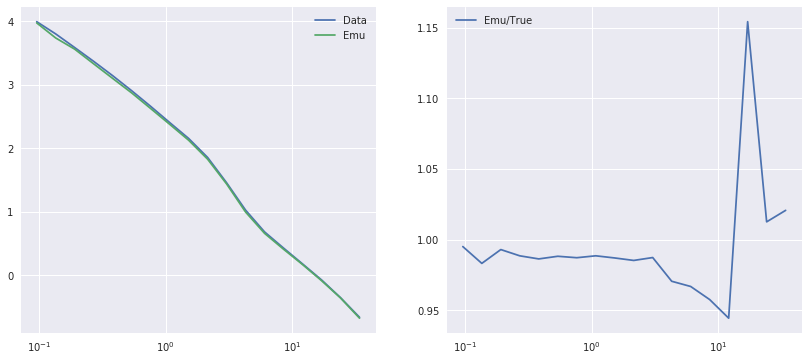

{'logM0': 13.164564564564564, 'sigma_logM': 0.11056056056056057, 'alpha': 1.0942942942942944, 'logM1': 13.694594594594594}


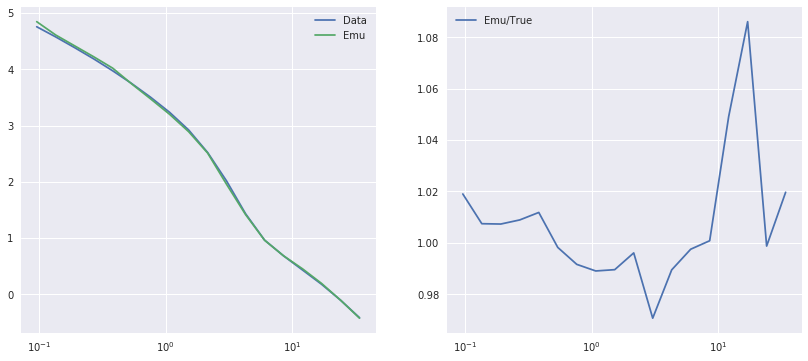

{'logM0': 14.358258258258259, 'sigma_logM': 0.2214214214214214, 'alpha': 0.8884884884884885, 'logM1': 14.08048048048048}


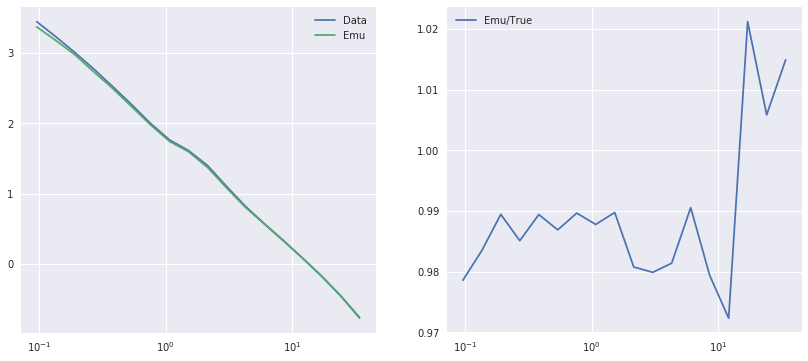

{'logM0': 13.365765765765765, 'sigma_logM': 0.24994994994994996, 'alpha': 0.822022022022022, 'logM1': 13.137537537537538}


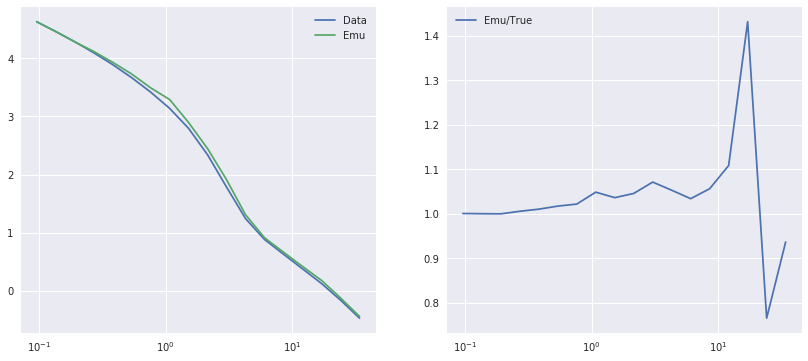

{'logM0': 13.6, 'sigma_logM': 0.07902902902902903, 'alpha': 1.095095095095095, 'logM1': 13.943843843843844}


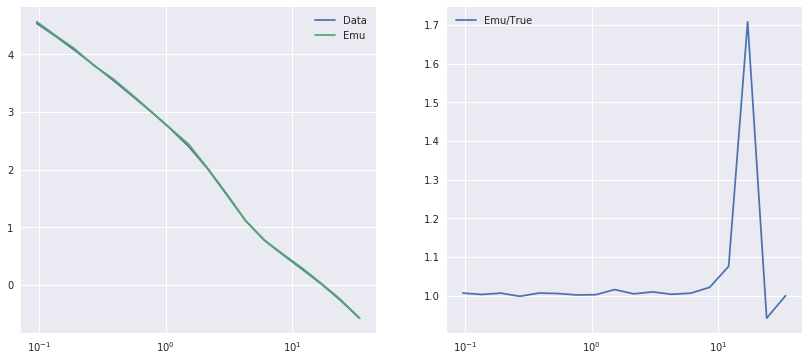

{'logM0': 13.856756756756756, 'sigma_logM': 0.0897897897897898, 'alpha': 0.8240240240240241, 'logM1': 13.696096096096095}


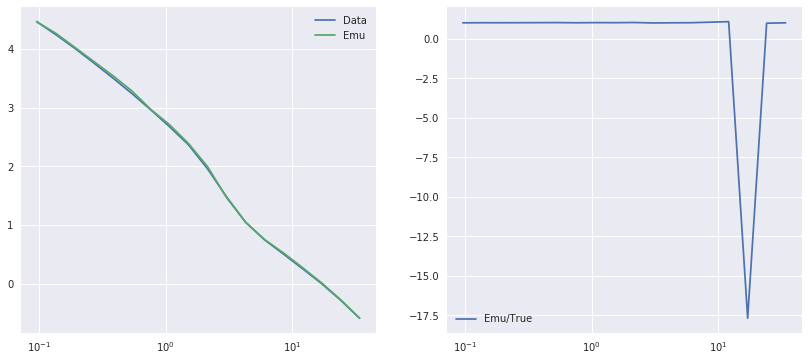

{'logM0': 13.256156156156155, 'sigma_logM': 0.24344344344344343, 'alpha': 0.9237237237237237, 'logM1': 13.445345345345345}


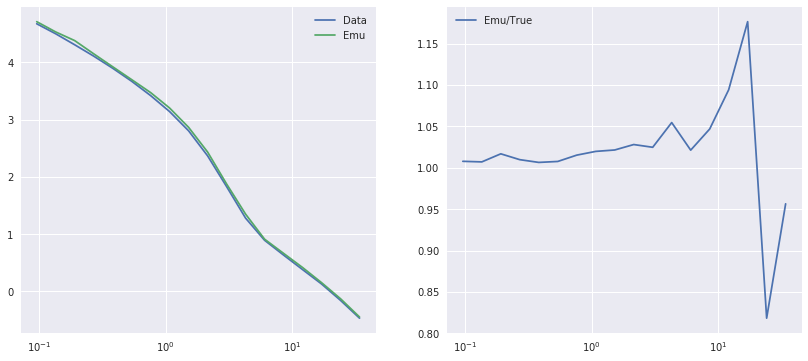

{'logM0': 13.157057057057056, 'sigma_logM': 0.2009009009009009, 'alpha': 1.0446446446446447, 'logM1': 14.4993993993994}


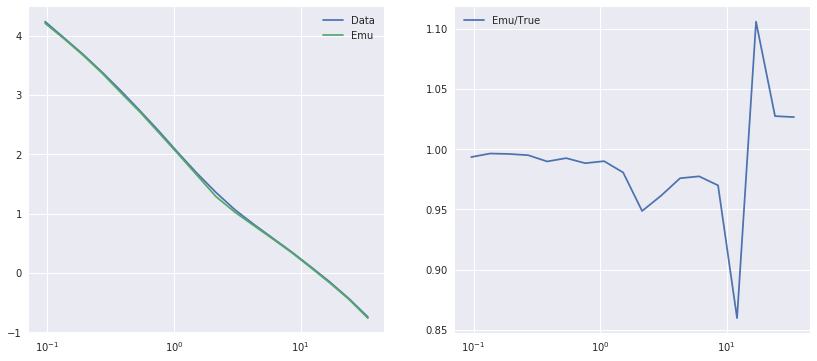

{'logM0': 14.446846846846846, 'sigma_logM': 0.08228228228228229, 'alpha': 0.9393393393393393, 'logM1': 14.295195195195195}


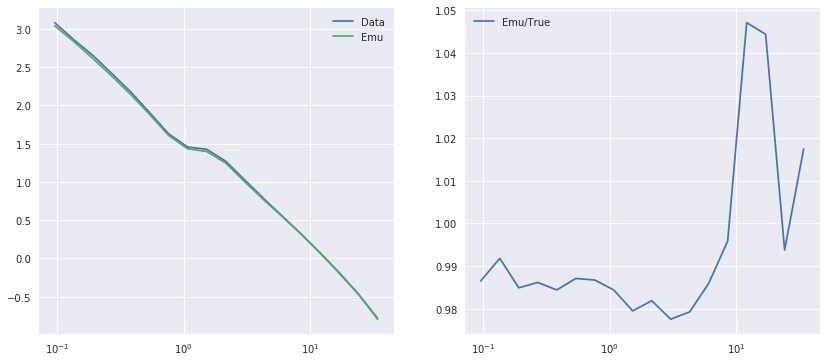

{'logM0': 13.283183183183183, 'sigma_logM': 0.2189189189189189, 'alpha': 0.958958958958959, 'logM1': 13.907807807807808}


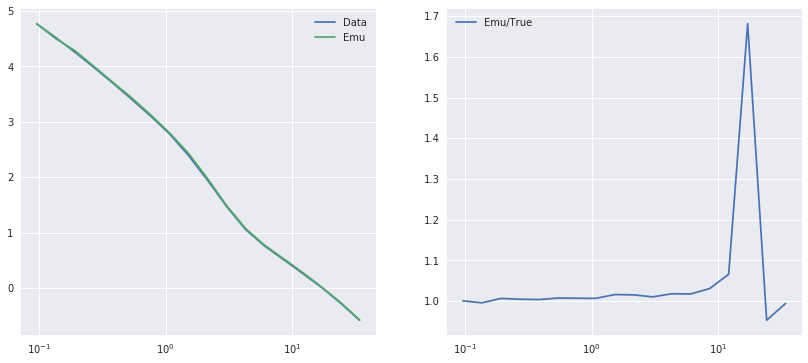

{'logM0': 14.52942942942943, 'sigma_logM': 0.1591091091091091, 'alpha': 1.0894894894894895, 'logM1': 13.364264264264264}


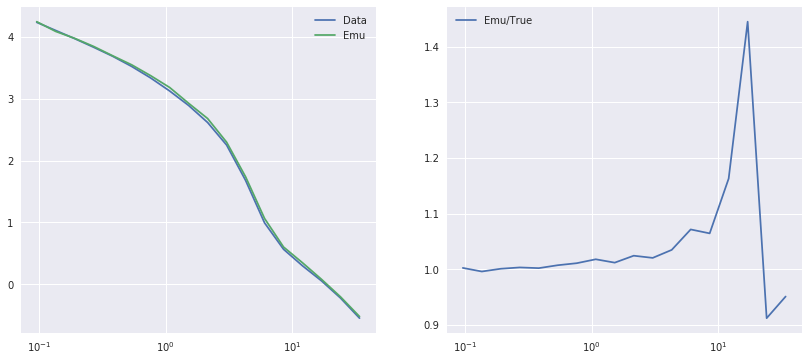

{'logM0': 13.55045045045045, 'sigma_logM': 0.17012012012012012, 'alpha': 0.8004004004004004, 'logM1': 13.822222222222221}


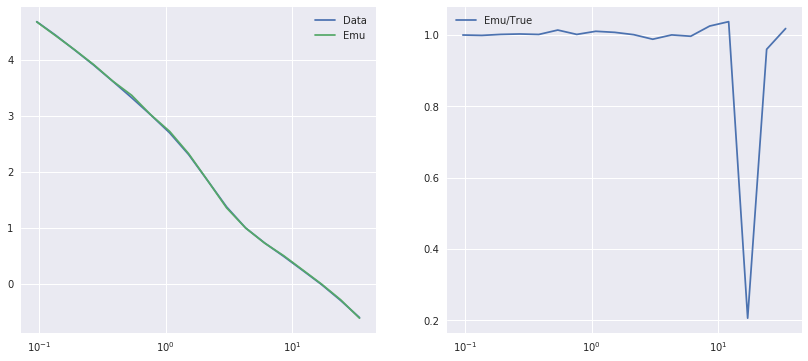

{'logM0': 13.996396396396396, 'sigma_logM': 0.07152152152152152, 'alpha': 0.9405405405405406, 'logM1': 13.152552552552553}


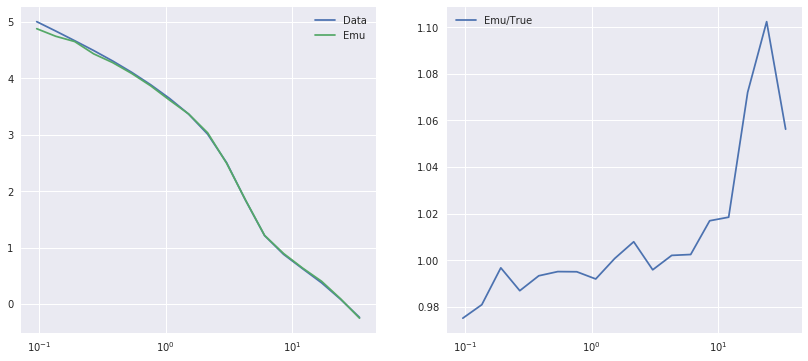

{'logM0': 13.8012012012012, 'sigma_logM': 0.2206706706706707, 'alpha': 1.1163163163163163, 'logM1': 14.592492492492493}


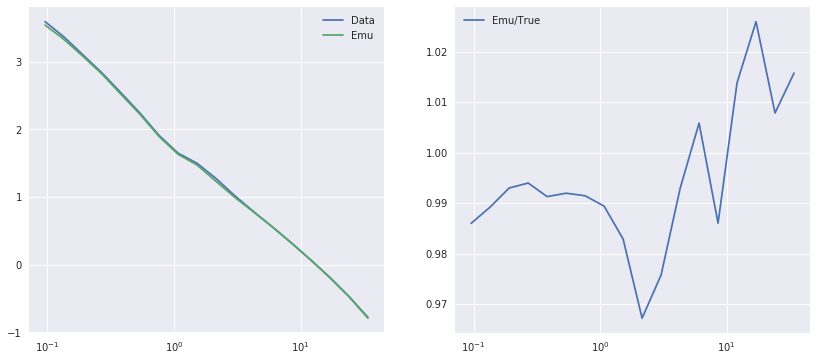

{'logM0': 13.736636636636636, 'sigma_logM': 0.06676676676676677, 'alpha': 0.9873873873873874, 'logM1': 14.15105105105105}


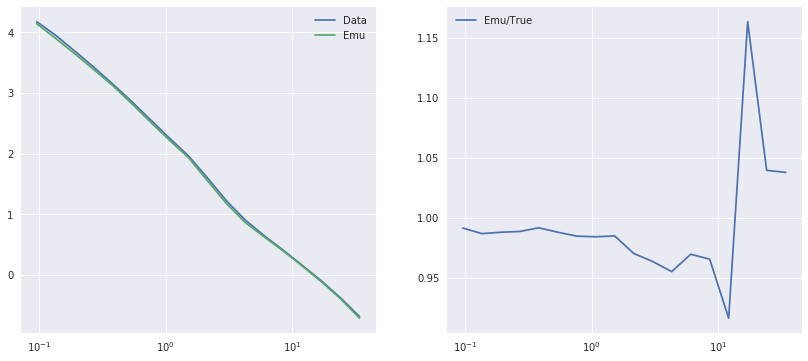

{'logM0': 13.397297297297296, 'sigma_logM': 0.22692692692692695, 'alpha': 0.8056056056056057, 'logM1': 14.098498498498499}


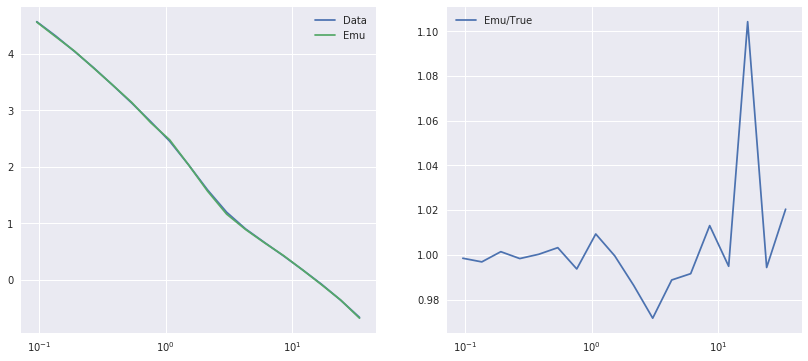

{'logM0': 14.493393393393394, 'sigma_logM': 0.16236236236236234, 'alpha': 0.8648648648648649, 'logM1': 14.006906906906906}


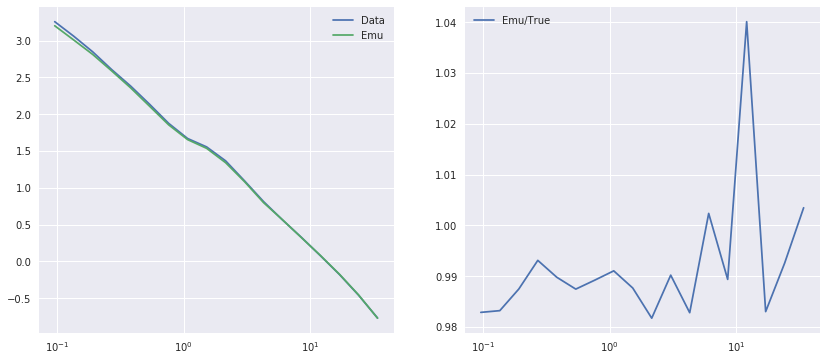

In [72]:
for idx in xrange(100):
    x_point = train_x[idx*emu.n_bins, :-1]
    y_point = train_y[idx*emu.n_bins:(idx+1)*emu.n_bins]
    pop_params = dict(zip(info['ordered_params'].keys(), x_point))

    
    #add_logMmin(pop_params, cat)
    print pop_params

    #_xi_vals = []
    #for i in xrange(10):
    #    cat.populate(pop_params, min_ptcl=100)
    #    _xi_vals.append(cat.calc_xi(r_bins))

    #xi_vals = np.log10(np.array(_xi_vals))
    #y_calc = xi_vals.mean(axis = 0)
    
    pop_params.update(cosmo_params)
    #del pop_params['logMmin']
    
    y_pred = emu.emulate_wrt_r(pop_params)[0]

    fig = plt.figure(figsize = (14, 6))

    plt.subplot(121)
    #plt.plot(rpoints, y_calc, label = 'Sim')
    plt.plot(rpoints, y_point, label = 'Data')
    plt.plot(rpoints, y_pred, label = 'Emu')
    plt.xscale('log')
    plt.legend(loc = 'best')
    plt.subplot(122)
    #plt.plot(rpoints, y_calc/y_point, label = 'Sim')
    plt.plot(rpoints, y_pred/y_point, label = 'Emu/True')
    plt.legend(loc = 'best')

    plt.xscale('log')
    plt.show()